# Anazliza eklsploracyjna danych

In [99]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn import metrics
from sklearn import tree

In [105]:
df=pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df_org=df.copy()
df.drop("Person ID", axis=1, inplace=True)
df.info()
number_of_cols = df.shape[1]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Liczba kolumn:", number_of_cols)
print("Kolumny numeryczne:", numerical_cols)
print("Kolumny kategoryczne: ", categorical_cols)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB
Liczba kolumn: 12
Kolumny numeryczne: ['Age', 'Sleep Duration', 'Quality of 

In [106]:

print("liczba danych brakujacych:", df.isna().sum().sum())
print("Liczba duplikatów: ",df.duplicated().sum())

liczba danych brakujacych: 0
Liczba duplikatów:  242


In [103]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


<Axes: >

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

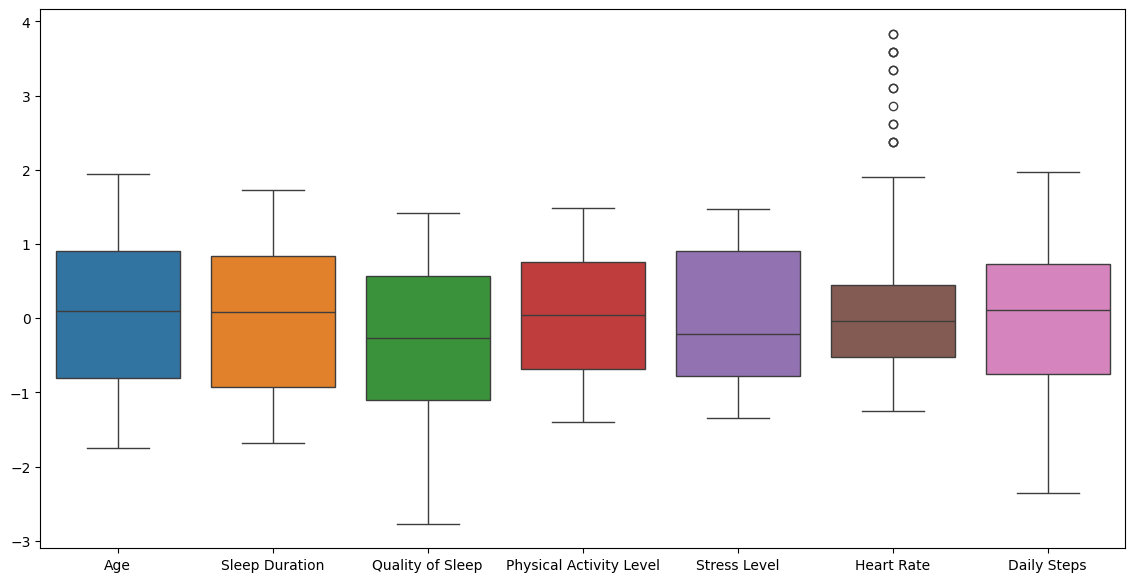

In [104]:
plt.figure(figsize = (14, 7), dpi = 100)

columns_to_plot = numerical_cols 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.figure(figsize = (14, 7), dpi = 100)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)
plt.figure(figsize = (14, 7), dpi = 100)
sns.boxplot(data=standardized_df[columns_to_plot])




W atrybucie tętna widzimy odstające wartości, chociaż rozkład międzykwartylowy jest najmniejszy. Największe rozproszenie wartości widzimy w jakości snu oraz w dziennej ilości kroków.

<Axes: title={'center': 'Ciśnienie krwi'}, xlabel='Skurczowe', ylabel='Rozkurczowe'>

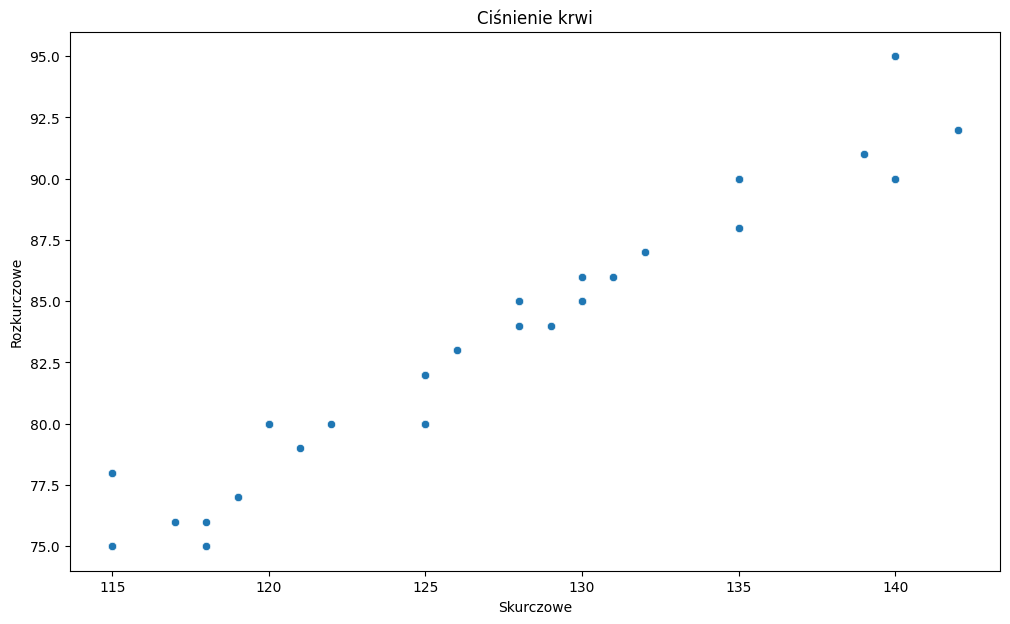

In [50]:
plt.figure(figsize = (12, 7), dpi = 100)
plt.xlabel('Skurczowe')
plt.ylabel('Rozkurczowe')

systolic=df['Blood Pressure'].apply(lambda x:int(x.split('/')[0]))
diastolic=df['Blood Pressure'].apply(lambda x:int(x.split('/')[1]))


plt.title("Ciśnienie krwi")
sns.scatterplot(x=systolic,y=diastolic)



Układ danych atrybutu ciśnienie krwi nie wskazuje na jakiekolwiek błędy - brak punktów odstających

Text(0.5, 0.98, 'Wiek według Płci')

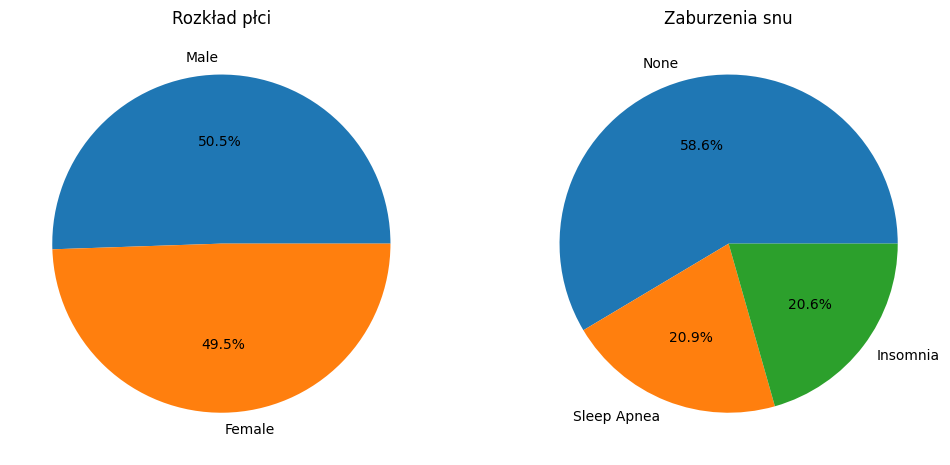

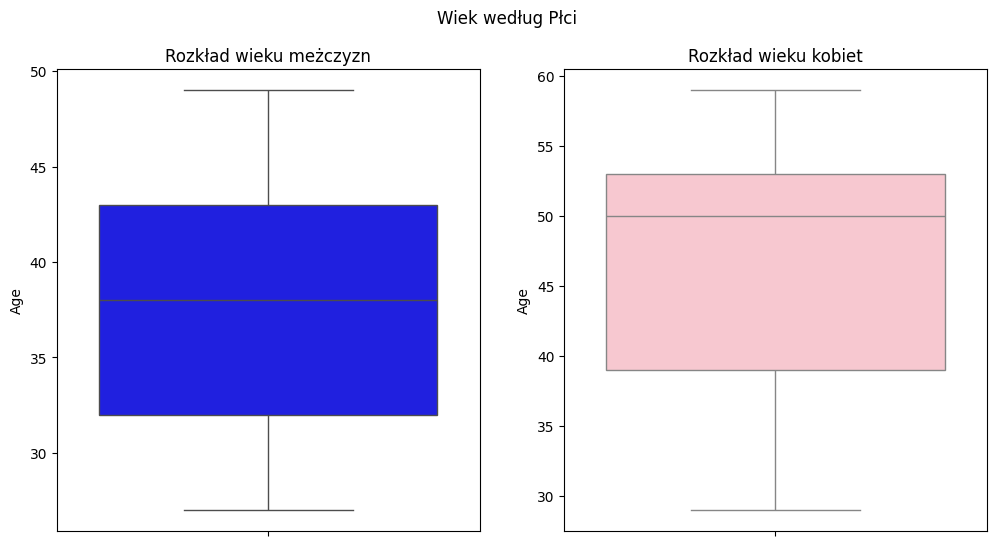

In [115]:
plt.figure(figsize = (12, 24))
plt.subplot(1, 2, 1)
gender_counts= df['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Rozkład płci")

plt.subplot(1, 2, 2)
disorder_counts= df['Sleep Disorder'].value_counts()
plt.pie(disorder_counts,labels=disorder_counts.index, autopct='%1.1f%%')
plt.title("Zaburzenia snu")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df_org[df_org['Gender']=='Male']['Age'],ax=axes[0],color='blue')
axes[0].set_title("Rozkład wieku meżczyzn")

sns.boxplot(df_org[df_org['Gender']=='Female']['Age'],ax=axes[1],color='pink')
axes[1].set_title("Rozkład wieku kobiet")
plt.suptitle('Wiek według Płci')

Liczba mężczyzn i kobiet w zbiorze jest zbliżona, rozkłady centylowe wieku są podobne, chociaż mediana wieku kobiet jest wyższa. W zbiorze większość osób jest zdrowa - około 60%. Na bezdech senny i bezsenność cierpi po około 20% osób. 

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\3029243179.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


Gender
Female   69.26
Male     71.05
Name: Heart Rate, dtype: float64


C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\3029243179.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\3029243179.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Rozkład tętna według płci')

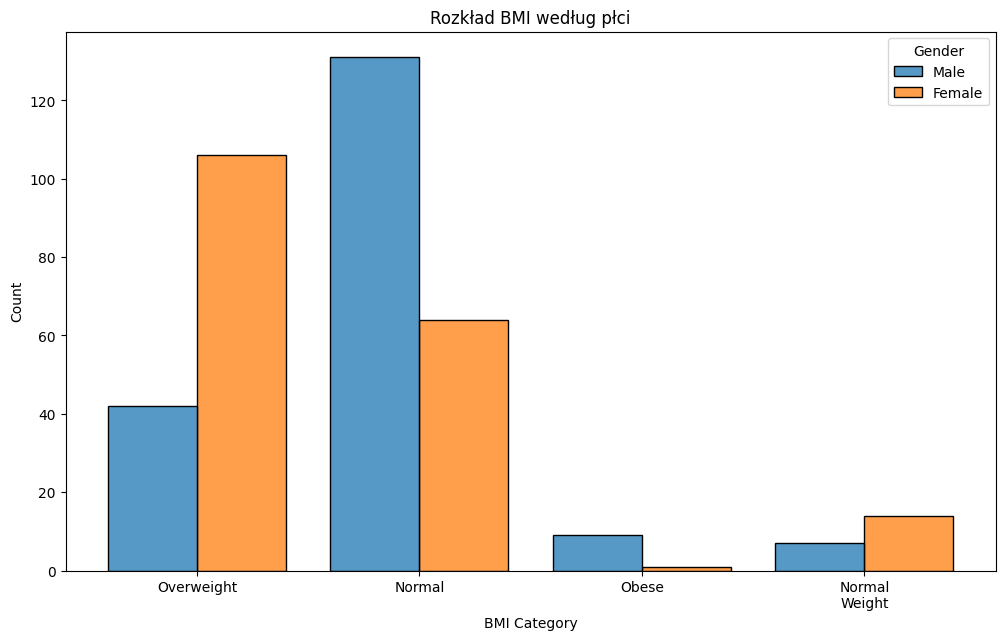

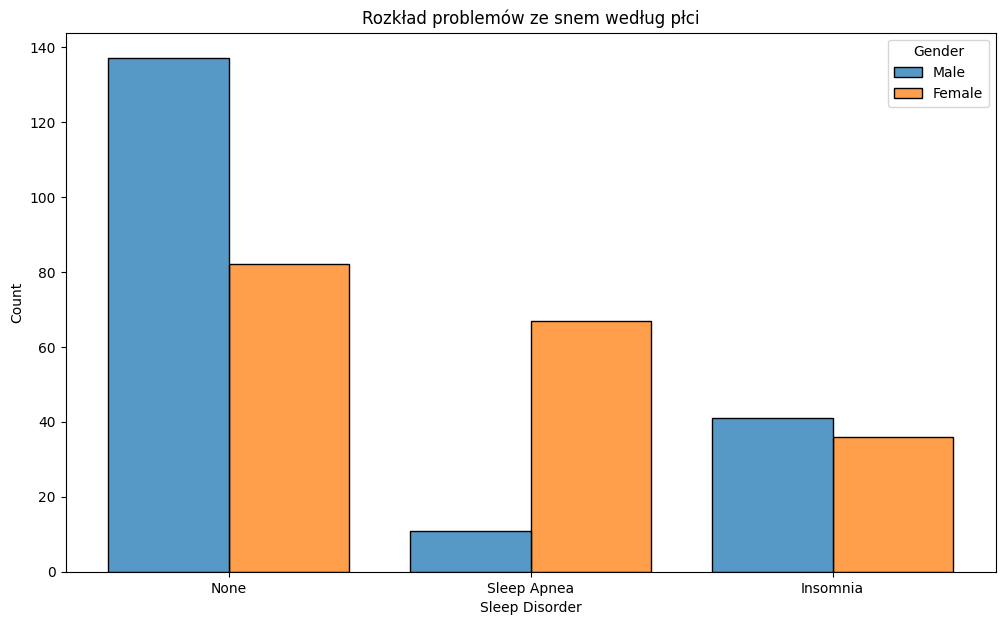

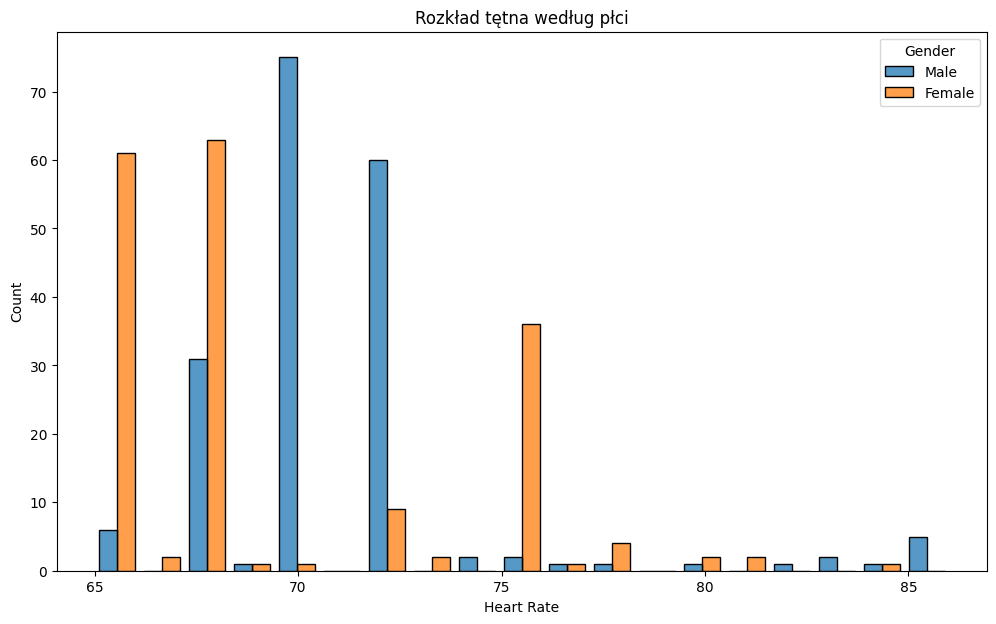

In [59]:

import textwrap
plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['BMI Category','Gender']], x="BMI Category", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład BMI według płci')

plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['Sleep Disorder','Gender']], x="Sleep Disorder", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład problemów ze snem według płci')

plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['Heart Rate','Gender']], x="Heart Rate", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

average_heart_rate = df.groupby('Gender')['Heart Rate'].mean()
print(average_heart_rate)


plt.title('Rozkład tętna według płci')

Na podstawie powżyszych wykresów można stwierdzić, że w zbiorze dominują dane osób rozumianych jako zdrowych, bezdech senny jest zaburzeniem przeważająco występującym u kobiet, a bezsenność występuje u obu płci z lekką przewagą mężczyzn. Widać też różnicę w rozkładzie tętna według płci, chociaż średnia mało się różni

<Figure size 1400x800 with 0 Axes>

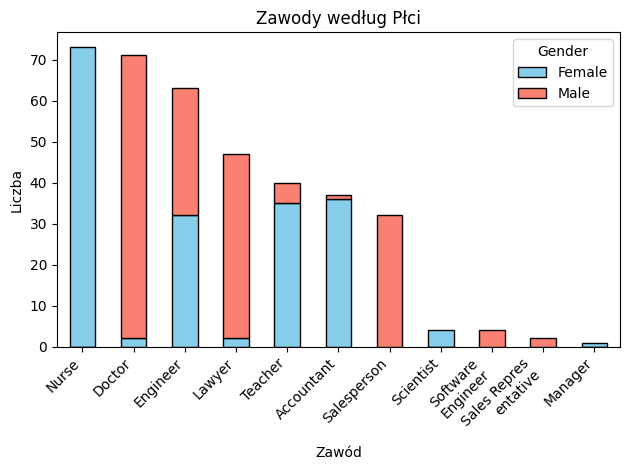

<Figure size 1400x800 with 0 Axes>

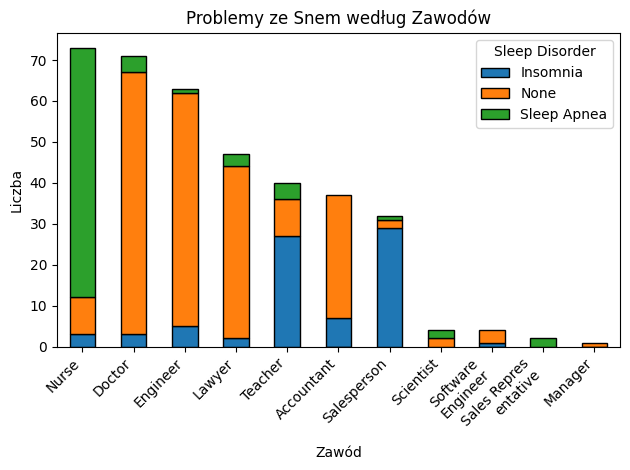

<Figure size 1400x800 with 0 Axes>

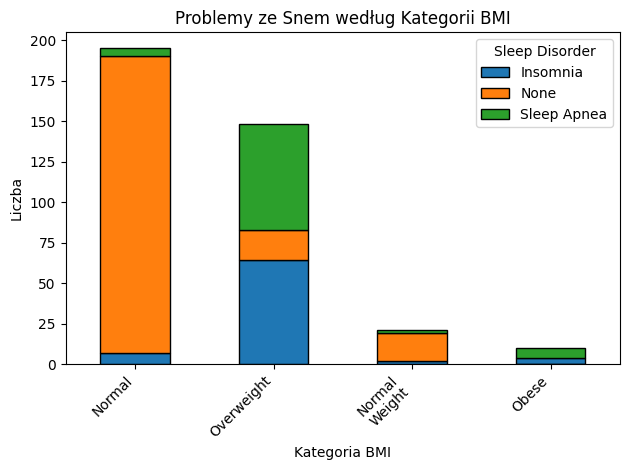

In [87]:
def plot_stacked_bar(df, x_col, hue_col, title, xlabel, ylabel, colors, figsize=(14, 8), dpi=100):
    """
    Tworzy stackowany wykres słupkowy dla dwóch kategorii.

    :param df: DataFrame z danymi
    :param x_col: Nazwa kolumny na osi X (kategoria 1)
    :param hue_col: Nazwa kolumny do rozróżnienia (kategoria 2)
    :param title: Tytuł wykresu
    :param xlabel: Etykieta osi X
    :param ylabel: Etykieta osi Y
    :param colors: Lista kolorów dla kategorii hue_col
    :param figsize: Rozmiar wykresu
    :param dpi: Rozdzielczość wykresu
    """
    category_counts = df[x_col].value_counts()
    category_order = category_counts.index.tolist()
    
    crosstab = pd.crosstab(df[x_col], df[hue_col]).loc[category_order]
    
    plt.figure(figsize=figsize, dpi=dpi)
    ax = crosstab.plot(
        kind='bar',
        stacked=True,
        color=colors,
        edgecolor='black'
    )
    
    labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.legend(title=hue_col)
    
    plt.tight_layout()
    
    plt.show()

gender_colors = ['skyblue', 'salmon', 'lightgreen', 'plum'] 
sleep_disorder_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  

plot_stacked_bar(
    df=df,
    x_col='Occupation',
    hue_col='Gender',
    title='Zawody według Płci',
    xlabel='Zawód',
    ylabel='Liczba',
    colors=gender_colors
)

plot_stacked_bar(
    df=df,
    x_col='Occupation',
    hue_col='Sleep Disorder',
    title='Problemy ze Snem według Zawodów',
    xlabel='Zawód',
    ylabel='Liczba',
    colors=sleep_disorder_colors
)

plot_stacked_bar(
    df=df,
    x_col='BMI Category',
    hue_col='Sleep Disorder',
    title='Problemy ze Snem według Kategorii BMI',
    xlabel='Kategoria BMI',
    ylabel='Liczba',
    colors=sleep_disorder_colors
)


Zawody, które są zdominowane przez kobiety, to między innymi pielęgniarka, nauczyciel czy księgowa. Mężczyźni dominują w zawodach lekarza, prawnika czy sprzedawcy. 
Profesjami najbardziej obciążonymi ryzykiem zaburzeń snu są: pielęgniarka, nauczyciel oraz sprzedawca. Występują one rzadko u doktorów, inżynierów, prawników czy księgowych. 
Istnieje bardzo ścisły związaek między zaburzeniami snu a kategorią BMI. Osoby z normalną wagą są dużo mniej narażone zarówno procentowo jak i w wartościach przypadków.

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\856190521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y='Age', data=df, palette='Set1')


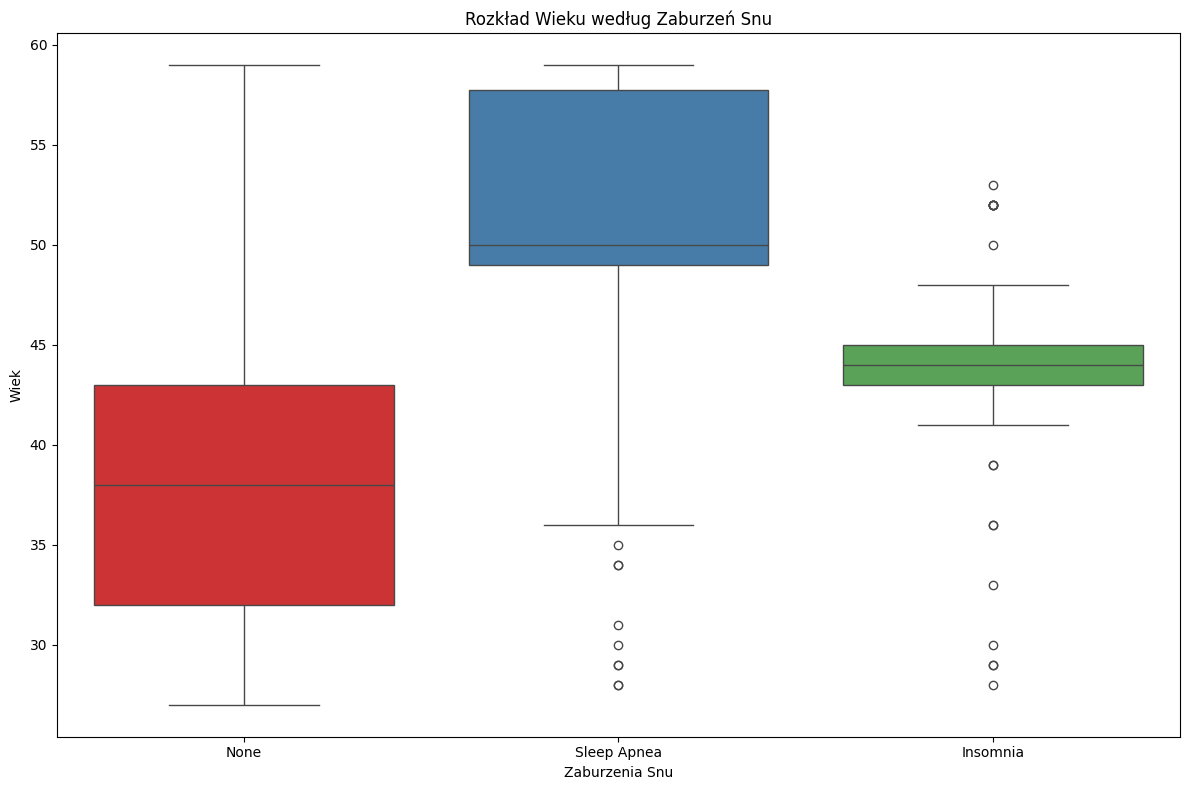

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\856190521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sleep Disorder', y='Age', data=df, palette='Set2')


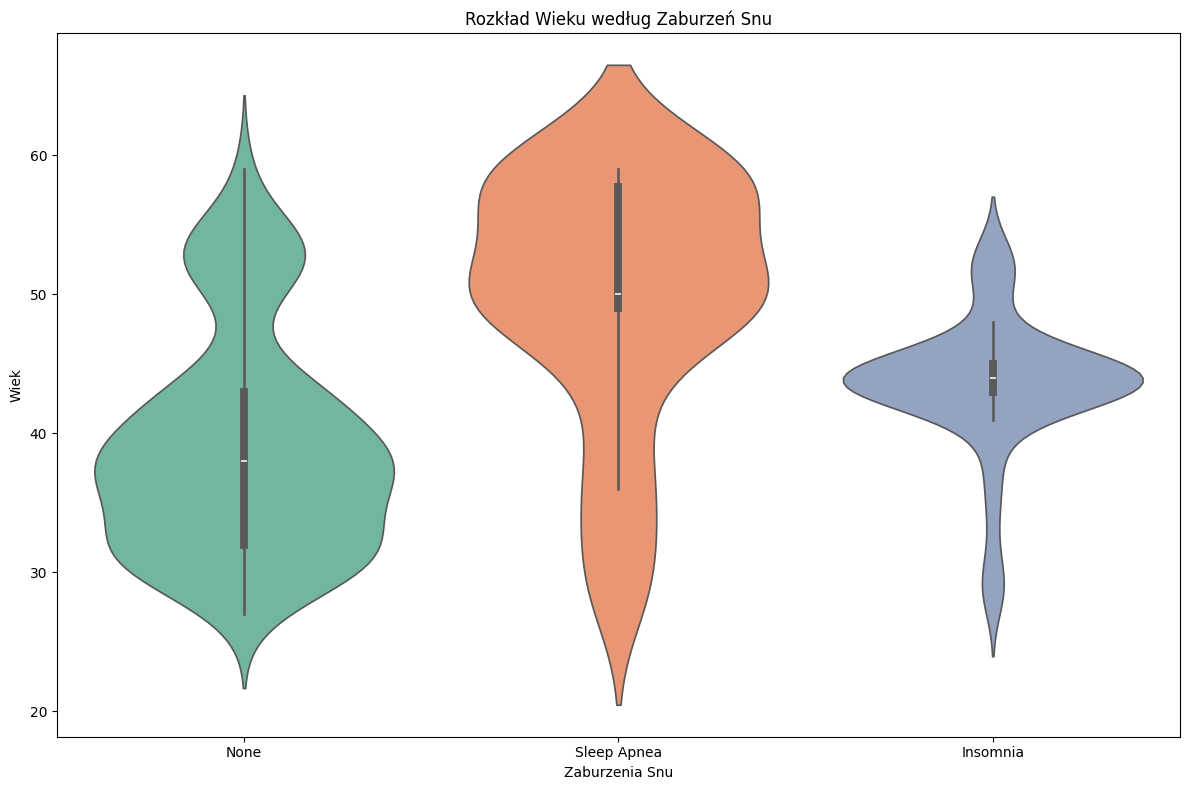

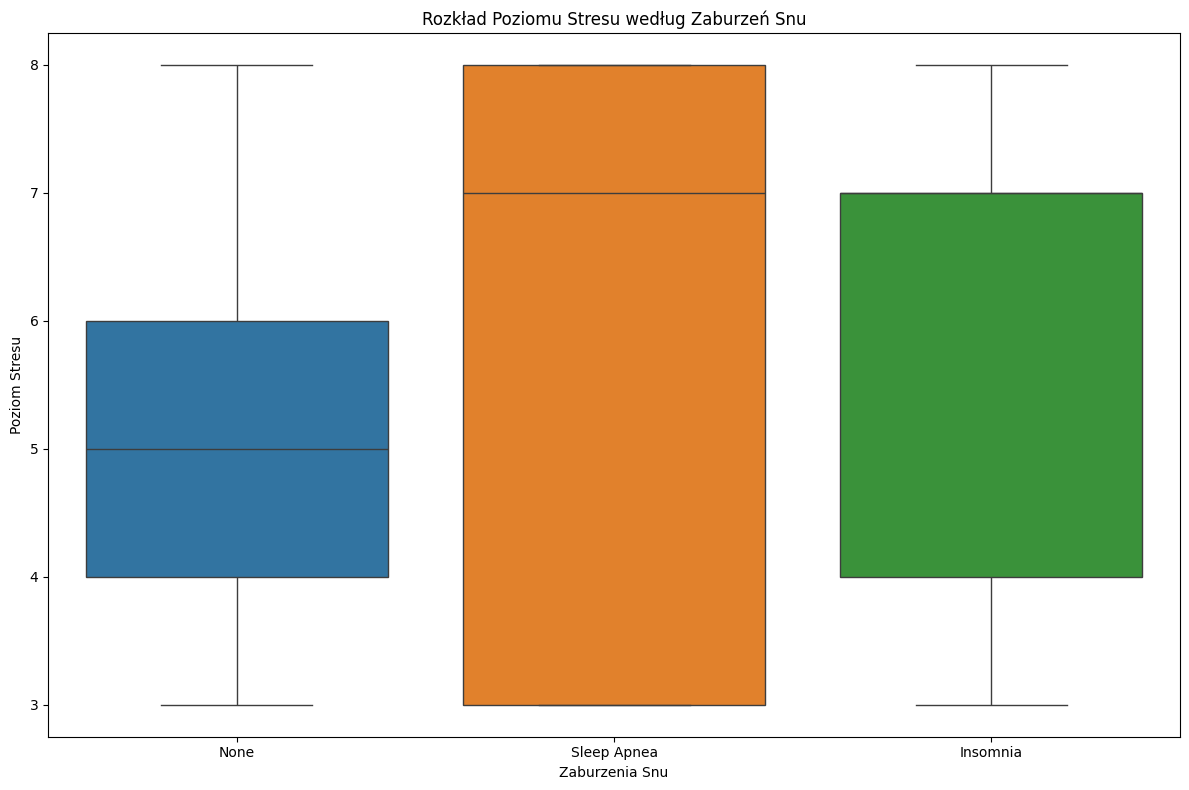

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\856190521.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sleep Disorder', y='Physical Activity Level', data=df, palette='Set2')


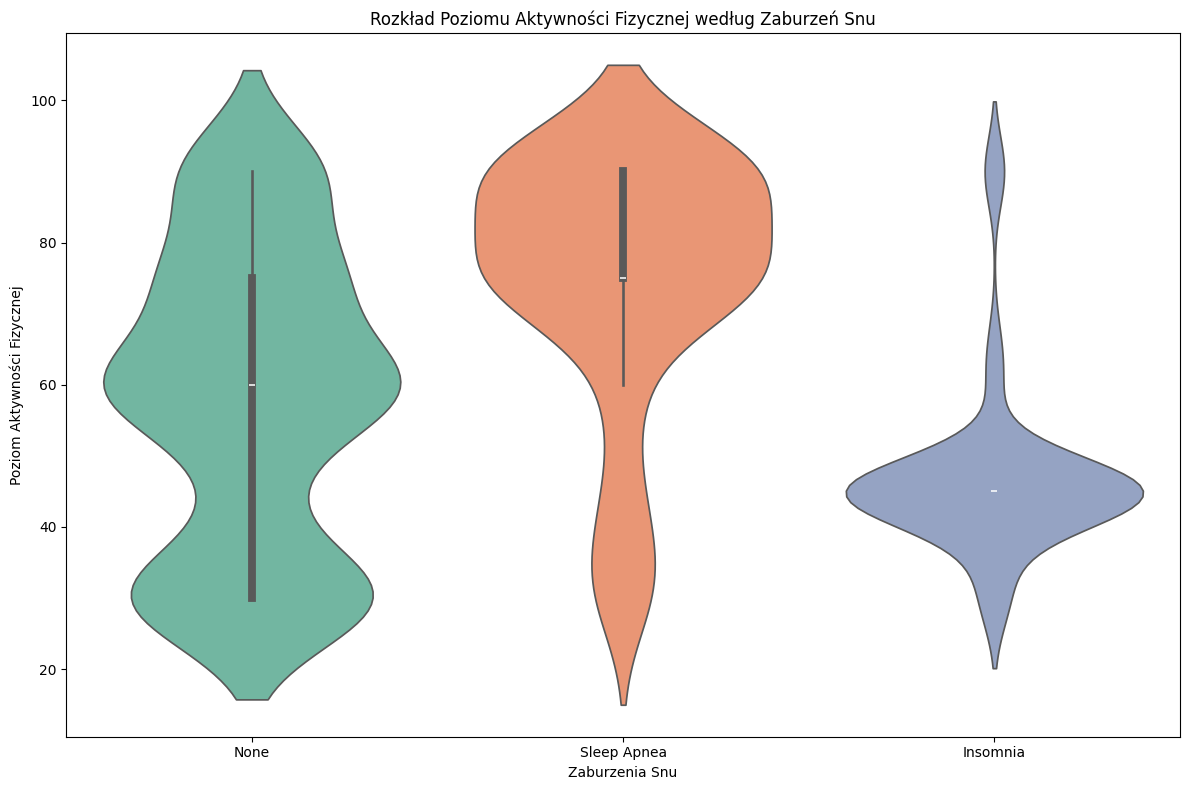

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\856190521.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='Set2')


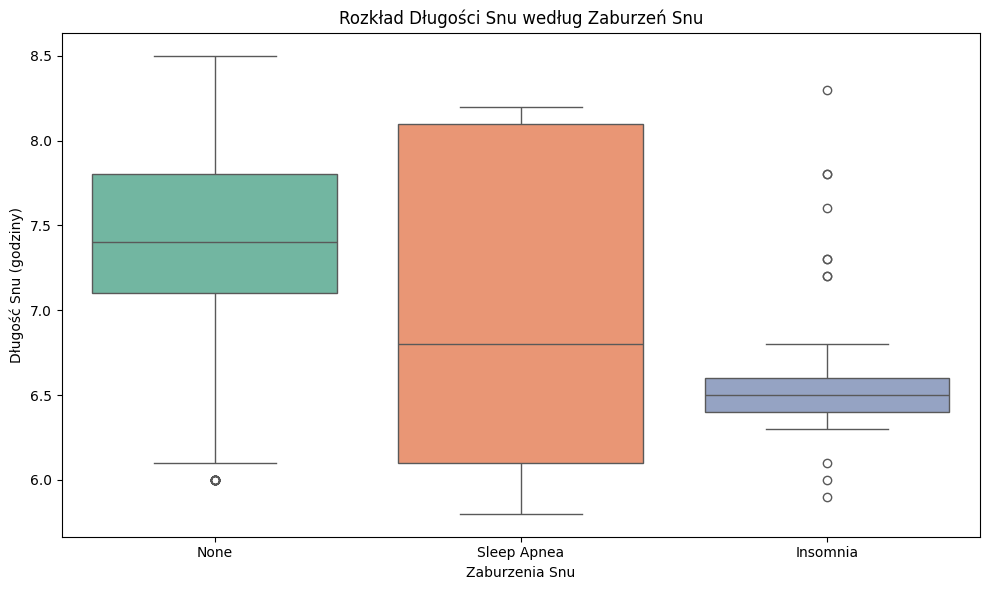

C:\Users\mzale\AppData\Local\Temp\ipykernel_201656\856190521.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df, palette='Set1')


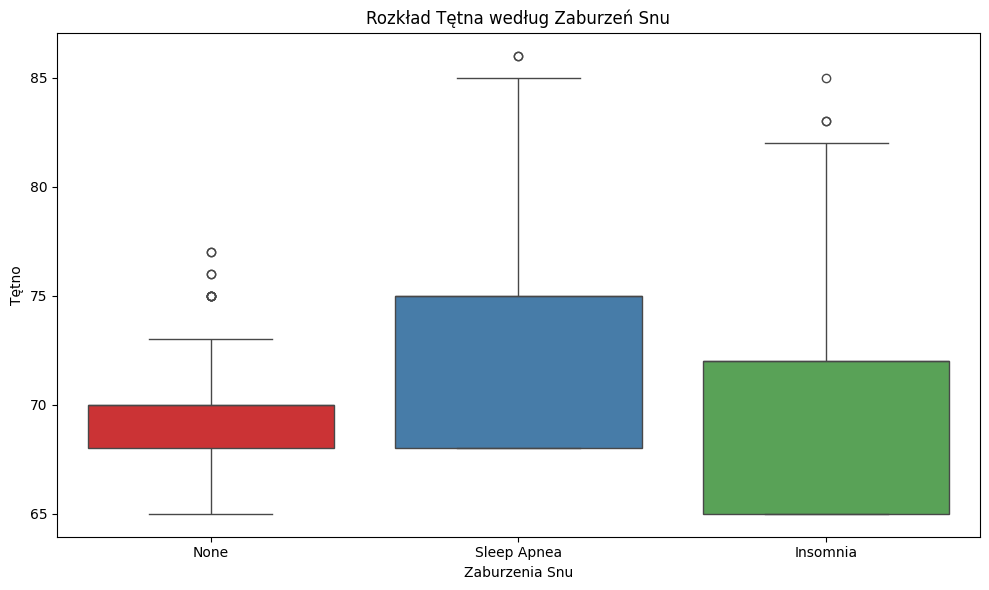

In [97]:
#Wiek a zaburzenia snu
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='Sleep Disorder', y='Age', data=df, palette='Set1')
plt.title('Rozkład Wieku według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Wiek')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8), dpi=100)
sns.violinplot(x='Sleep Disorder', y='Age', data=df, palette='Set2')
plt.title('Rozkład Wieku według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Wiek')
plt.tight_layout()
plt.show()

#Stres a zaburzenia snu
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df, hue="Sleep Disorder")
plt.title('Rozkład Poziomu Stresu według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Poziom Stresu')
plt.tight_layout()
plt.show()

#Poziom aktywności fizycznej a zaburzenia snu
plt.figure(figsize=(12, 8), dpi=100)
sns.violinplot(x='Sleep Disorder', y='Physical Activity Level', data=df, palette='Set2')
plt.title('Rozkład Poziomu Aktywności Fizycznej według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Poziom Aktywności Fizycznej')
plt.tight_layout()
plt.show()

#Długość snu a zaburzenia snu
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='Set2')
plt.title('Rozkład Długości Snu według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Długość Snu (godziny)')
plt.tight_layout()
plt.show()

#Tętno według zaburzeń snu
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df, palette='Set1')
plt.title('Rozkład Tętna według Zaburzeń Snu')
plt.xlabel('Zaburzenia Snu')
plt.ylabel('Tętno')
plt.tight_layout()
plt.show()

Osoby z zaburzeniami snu są zwykle starsze niż osoby zdrowe. Na bezdech senny cierpią zwykle osoby starsze, chociaż odstające punkty wskazują, że występują również u młodych osób. Bezsenność występuje głównie u osób w średnim wieku z rzadszymi przypadkami u osób starszych i młodszych.
Podwyższony stres jest związany z zaburzeniami snu, choć rozrzut jest duży. Ozoby z bezdechem sennym są najbardziej aktywne fizycznie, natomiast bezsenność jest silnie związana z  średnim poziomem aktywności fizycznej. Znaczne różnice występują w długości snu między osobami zdrowymi a chorymi. Osoby zdrowe śpią zwykle 7-8 godzin, natomiast osoby z bezdechem sennym śpią średnio krócej - mniej niż 7 godzin, widać też w tej grupie bardzo dużą zmienność długości snu. Praktycznie wszystkie osoby z bezsennością śpią krótko - około 6.5 godzin z kilkoma wyjątkami. 

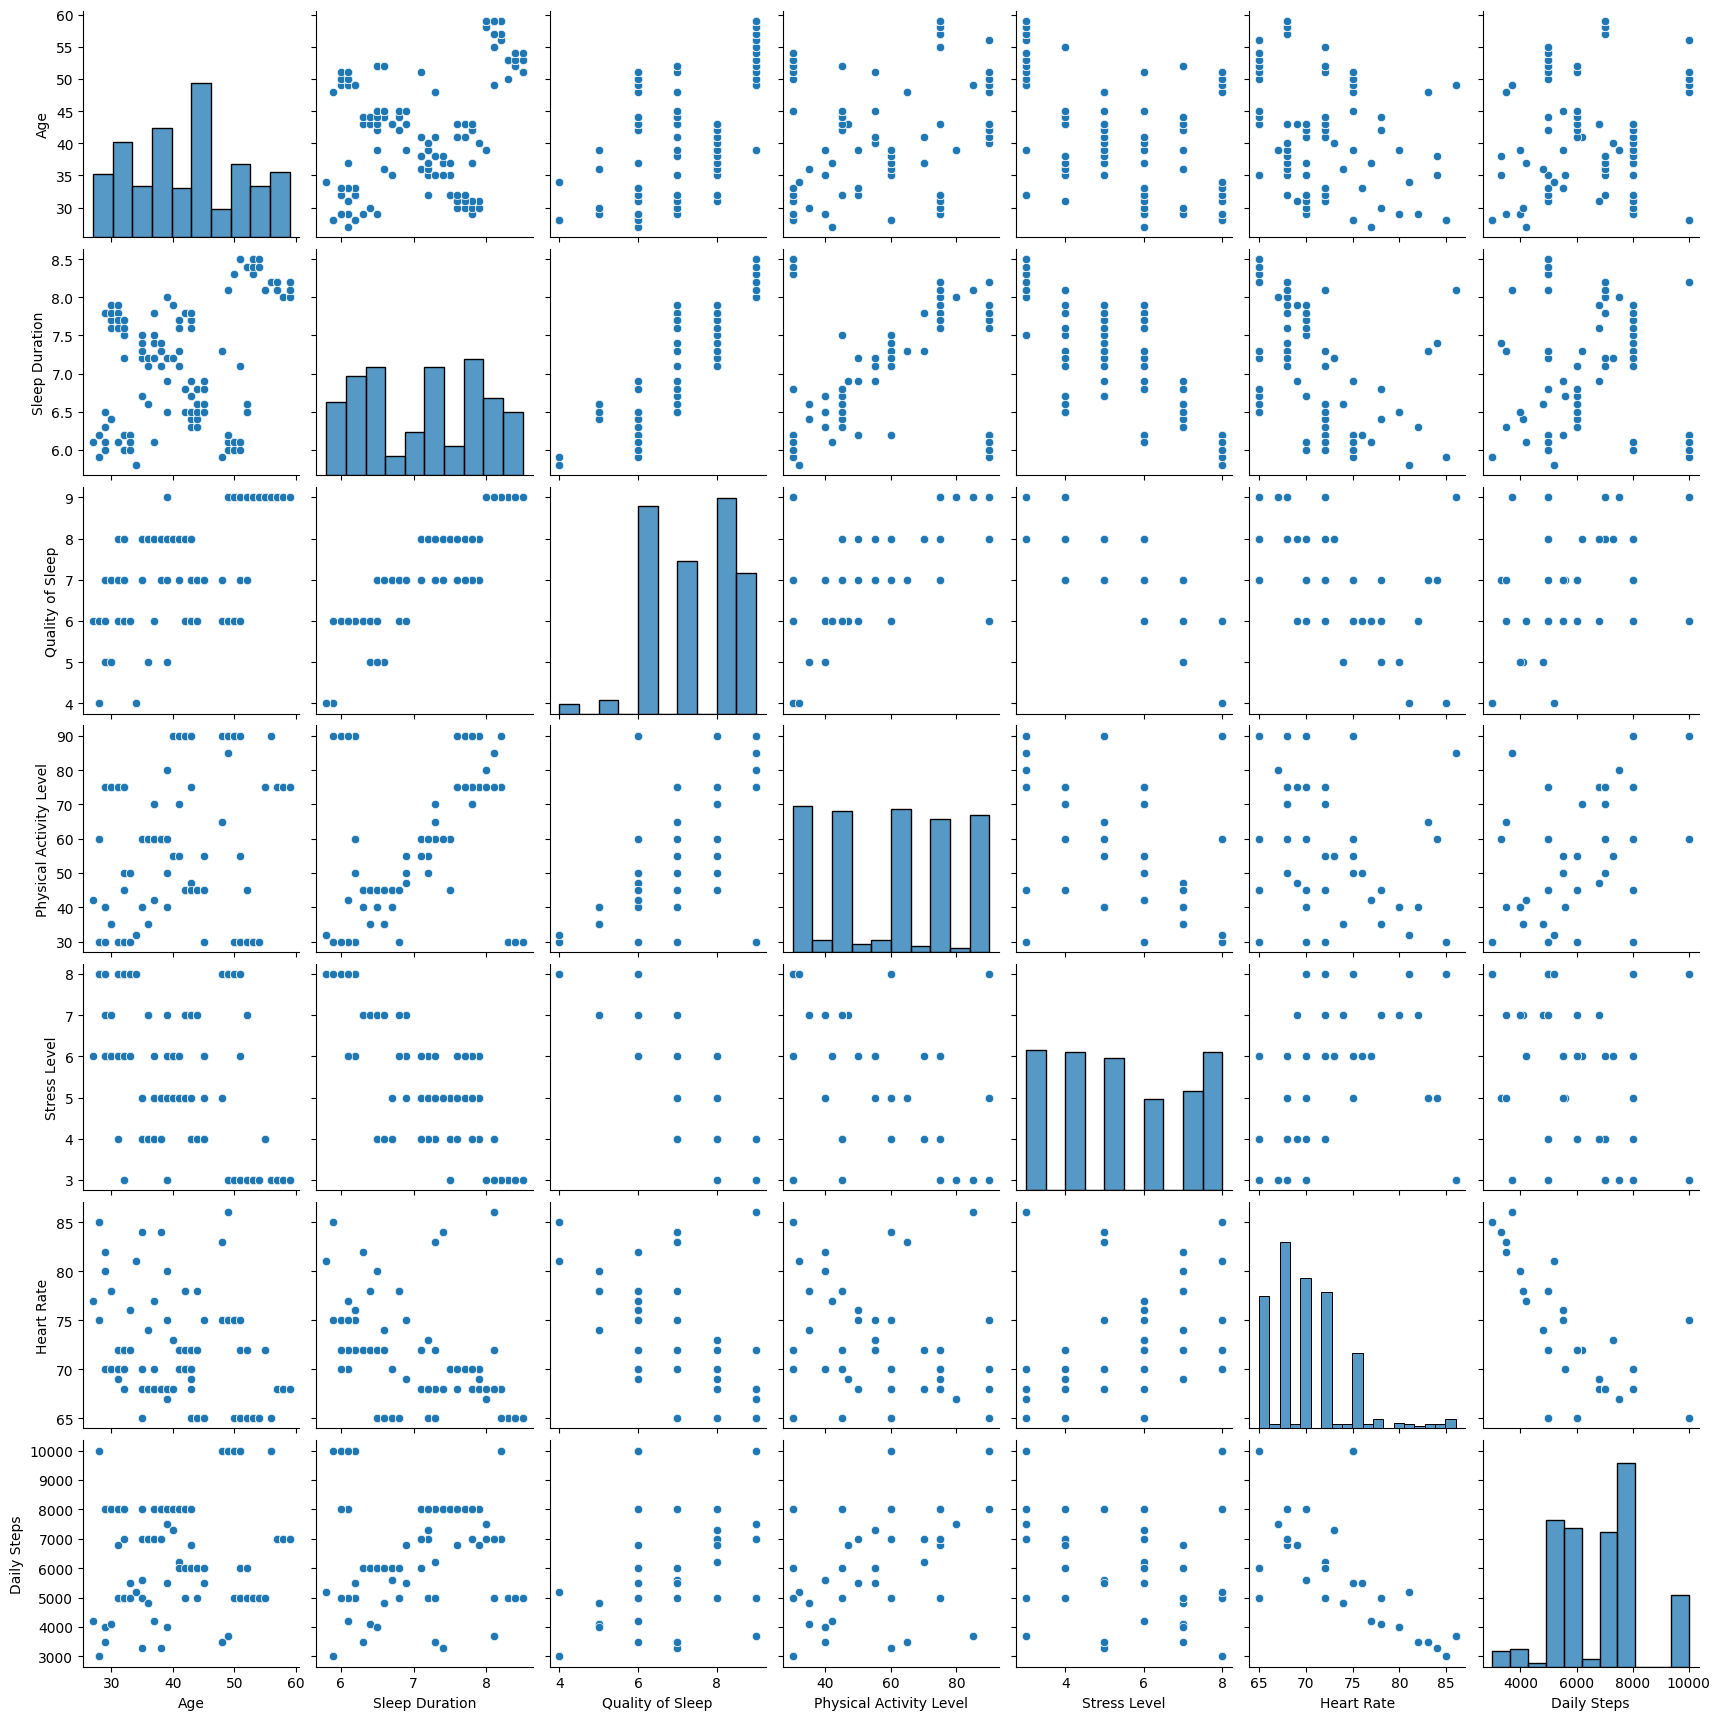

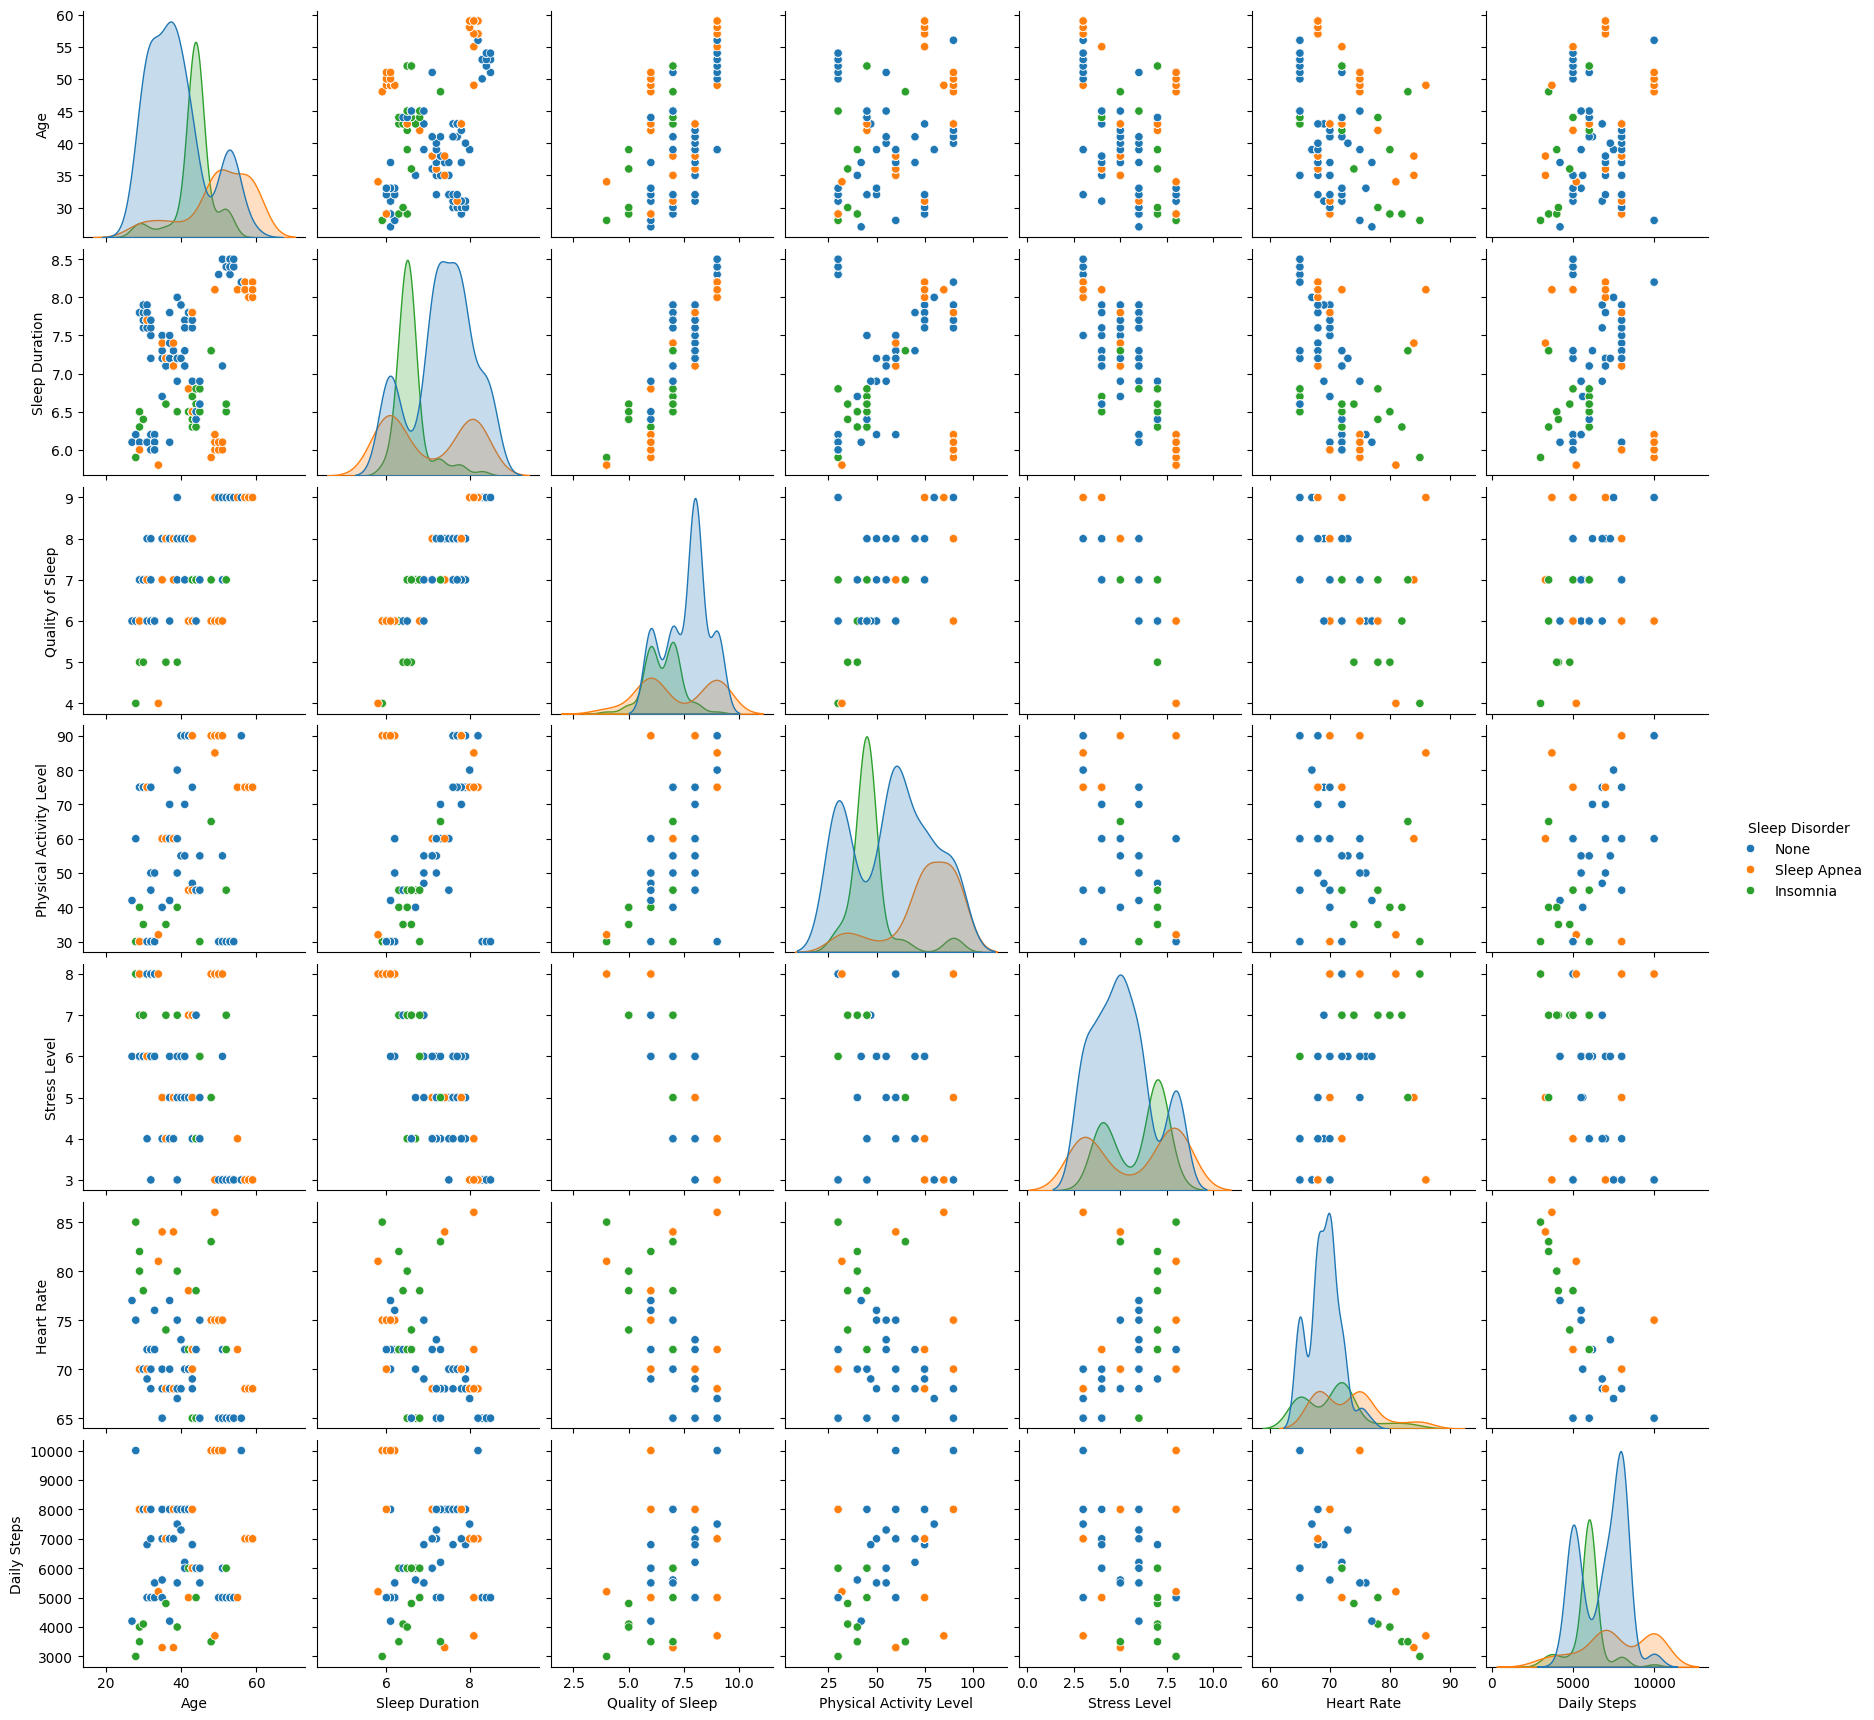

In [42]:

sns.pairplot(data=df)
sns.pairplot(data=df, hue='Sleep Disorder')

Rozkład atrybutów we wzajemnej przestrzeni cech jest w większości przypadków mocno przemieszany. Para wiek/długość snu tworzy pewne niewielkie skupiska na tle pozostałych, lecz są one dość trudne do wyodrębnienia. Pary Sleep Duration i Stress Level oraz Quality of Sleep i Stress Level są dość wyraźnie skorelowane ujemnie, natomiast pary Quality Of Sleep i Sleep Duration oraz Sleep Duration i Physical Activity Level są wyraźnie skorelowane dodatnio.`

<Axes: >

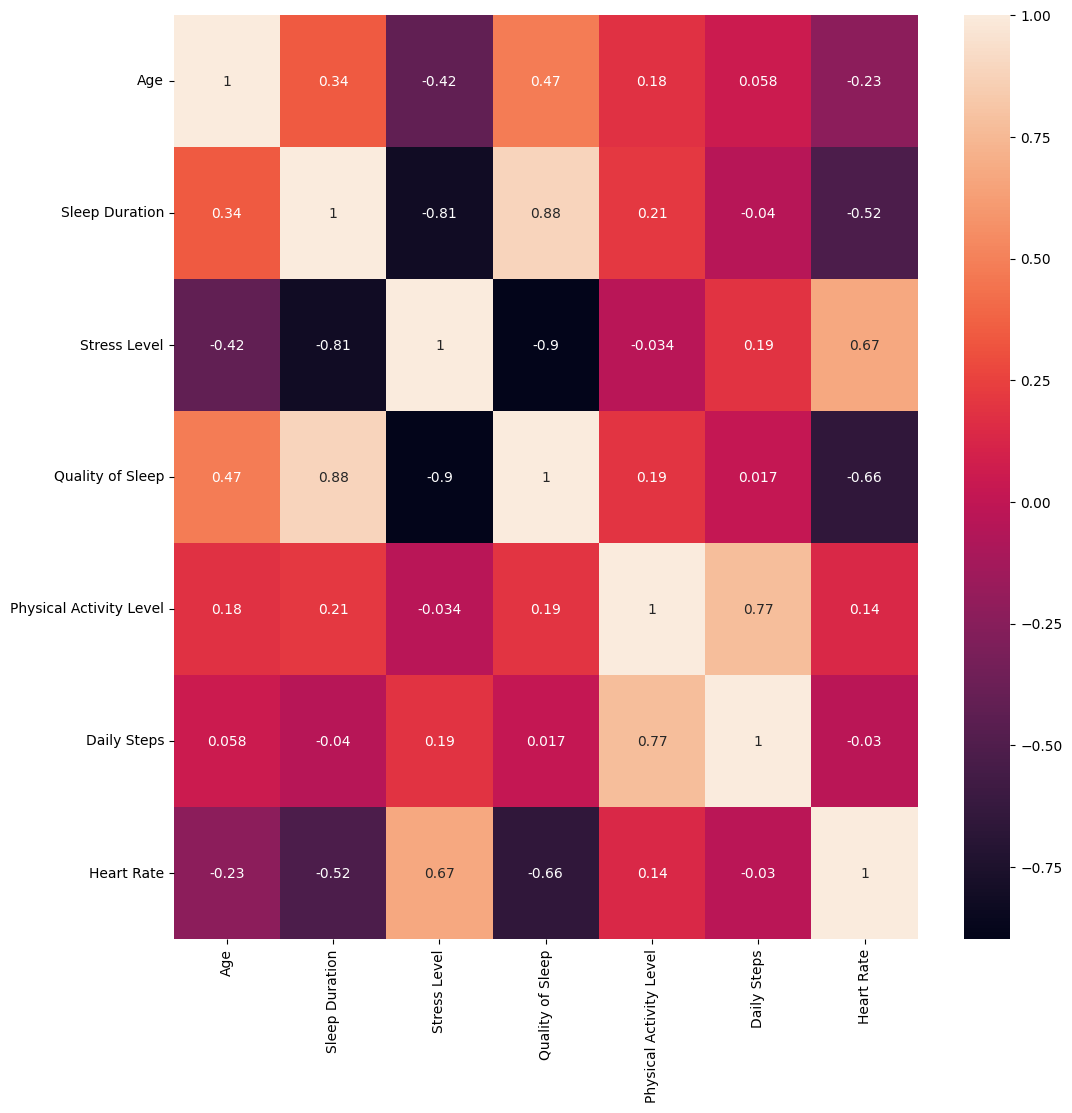

In [158]:
dcorr=df[['Age','Sleep Duration','Stress Level','Quality of Sleep','Physical Activity Level','Daily Steps','Heart Rate']]
plt.figure(figsize = (12, 12), dpi = 100)
sns.heatmap(dcorr.corr(),annot = dcorr.corr())

W powyższej macierzy kowariancji obserwujemy mocne ujemne skorelowanie atrybutów Quality Of Sleep i Stress Level oraz Stress Level i Sleep Duration, a także średnie ujemne skorelowanie atrybutów Quality Of Sleep i Heart Rate, Sleep Duration i Heart Rate oraz Stress Level i Age. Z kolei mocno dodatnio skorelowane są atrybuty Quality Of Sleep i Sleep Duration i średnio dodatnio Stress Level i Heart Rate oraz Physical Activity i Daily Steps. Celem minimalizacji ryzyka nadmiernego dopasowania oraz przyspieszenia procesu uczenia, atrybuty Quality of Sleep i Sleep Duration i Daily Steps nie będą brane pod uwagę w procesie uczenia, z uwagi na ich nadmiarowość z punktu widzenia korelacji.

# Uczenie nadzorowane

In [159]:
def granice(model,data,atr_x, atr_y,tytul,kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje divide)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

In [160]:
def divide(df,proporcja):
    # divides set to training and test subsets
    # df - data frame; proporcja - division ratio
    # returns dictionary with following keys:
    # opis_ucz/opis_test - matrix of describing attributes training/test set
    # dec_ucz/dec_test - vector of decision attribute's values of training/test set
    # attention: decision attribute is always the last column of df
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja, random_state=2)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}



In [161]:
def verify(model,data,atrib):
    # prints classifier results as confusion matrix
    # for test and training set
    # model - classifier model
    # data - data (dictionary returned by divide function)
    # atrib - list of attributes' indexes considered in verification 
    model.fit(data["opis_ucz"].iloc[:,atrib], data["dec_ucz"])
    result_train = model.predict(data["opis_ucz"].iloc[:,atrib])
    result_test = model.predict(data["opis_test"].iloc[:,atrib])
    cm_train = confusion_matrix(data["dec_ucz"],result_train)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(cm_train))/np.sum(cm_train))
    print(model.score(data['opis_ucz'],data['dec_ucz']))
    print(cm_train)
    cm_test = confusion_matrix(data["dec_test"],result_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(cm_test))/np.sum(cm_test))
    print(model.score(data['opis_test'],data['dec_test']))
    print(cm_test) 
    return cm_train,cm_test
    

In [162]:
#df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
d=df[['Age','Stress Level','Heart Rate','Physical Activity Level','Sleep Disorder']]

In [163]:
def errorChart(error_data,xlabel,ylabel):
    plt.figure(dpi=90)
    plt.plot(np.arange(1, len(error_data)+1), error_data,'bo-')
    plt.title('Wykres błędu')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

### Klasyfikator KNN

macierz pomyłek - zbiór uczący, dokładność: 0.8084291187739464
0.8084291187739464
[[ 49   3   3]
 [ 16 120  15]
 [  4   9  42]]
macierz pomyłek - zbiór testowy, dokładność: 0.831858407079646
0.831858407079646
[[19  2  1]
 [ 5 56  7]
 [ 1  3 19]]
macierz pomyłek - zbiór uczący, dokładność: 0.7854406130268199
0.7854406130268199
[[ 52   3   0]
 [ 20 129   2]
 [ 18  13  24]]
macierz pomyłek - zbiór testowy, dokładność: 0.8053097345132744
0.8053097345132744
[[19  3  0]
 [ 7 60  1]
 [ 7  4 12]]
macierz pomyłek - zbiór uczący, dokładność: 0.9042145593869731
0.9042145593869731
[[ 47   5   3]
 [  4 143   4]
 [  3   6  46]]
macierz pomyłek - zbiór testowy, dokładność: 0.9203539823008849
0.9203539823008849
[[19  3  0]
 [ 2 65  1]
 [ 2  1 20]]
macierz pomyłek - zbiór uczący, dokładność: 0.8850574712643678
0.8850574712643678
[[ 47   6   2]
 [  5 142   4]
 [  4   9  42]]
macierz pomyłek - zbiór testowy, dokładność: 0.9203539823008849
0.9203539823008849
[[19  3  0]
 [ 2 65  1]
 [ 1  2 20]]
macierz po

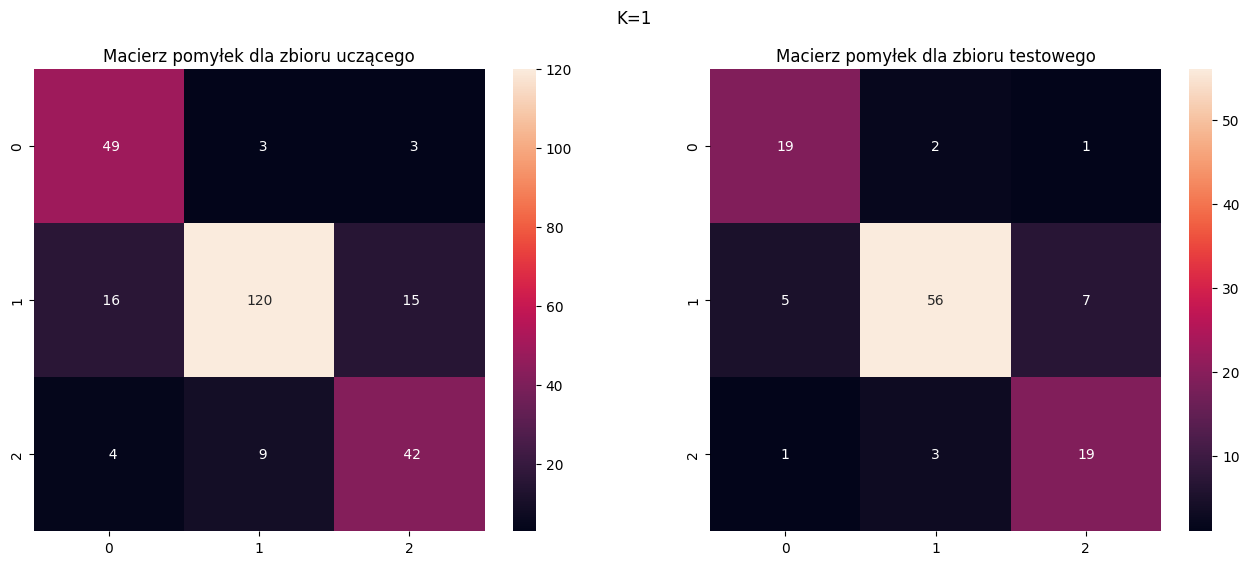

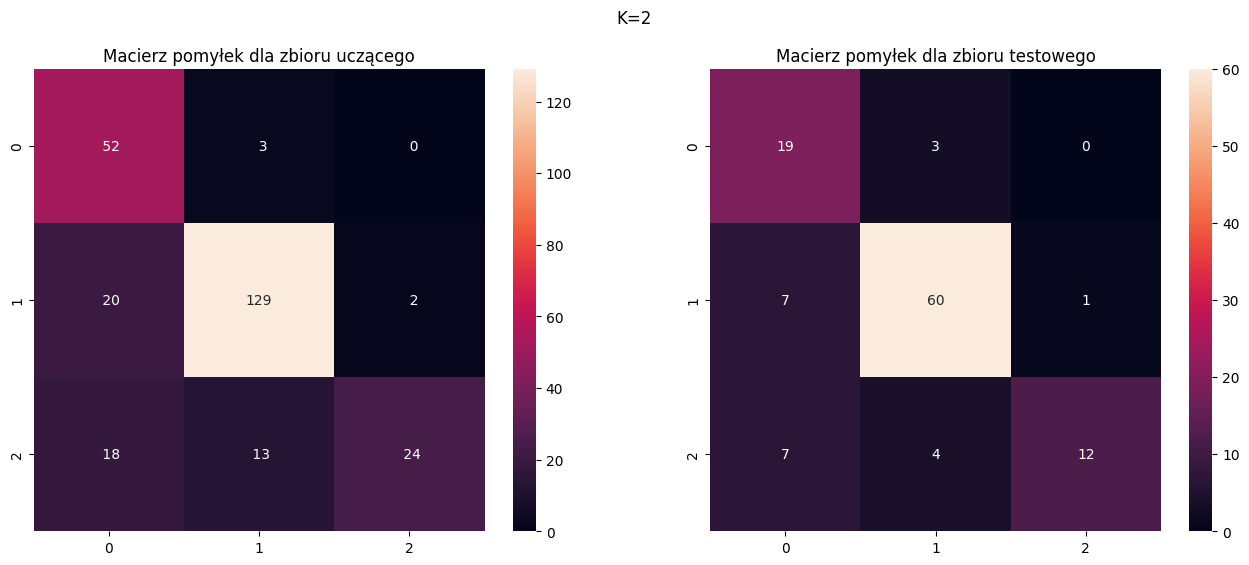

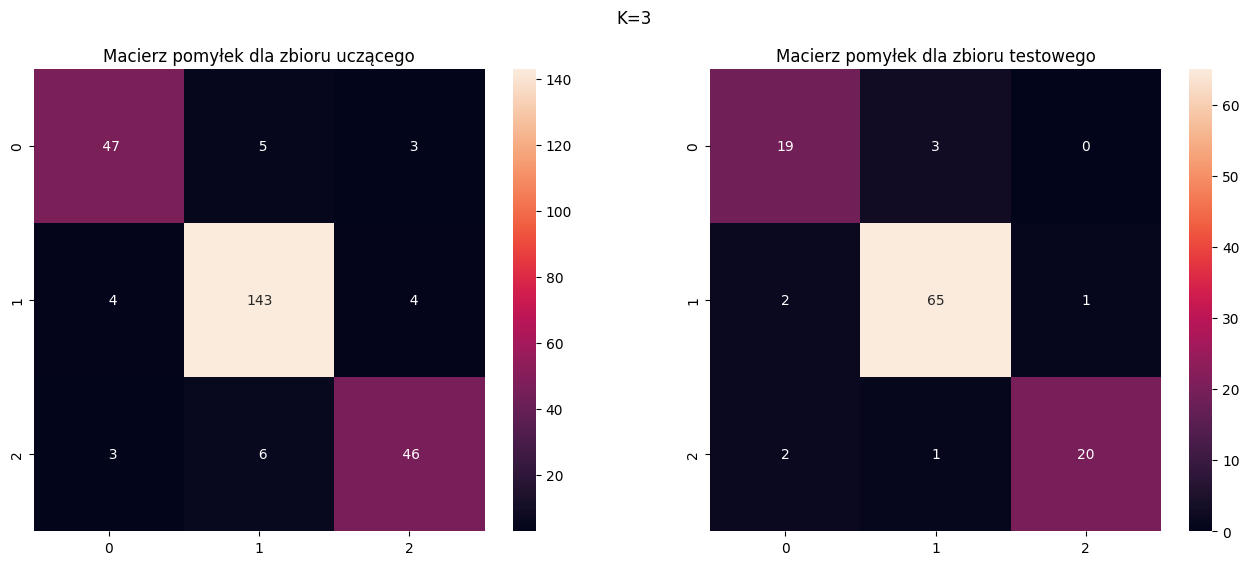

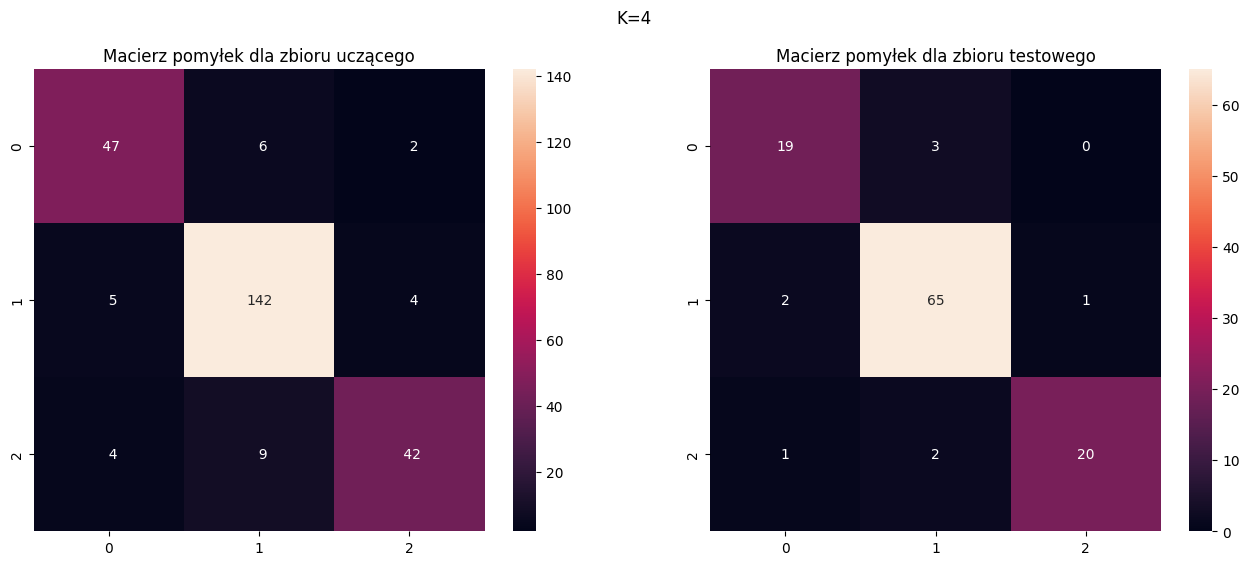

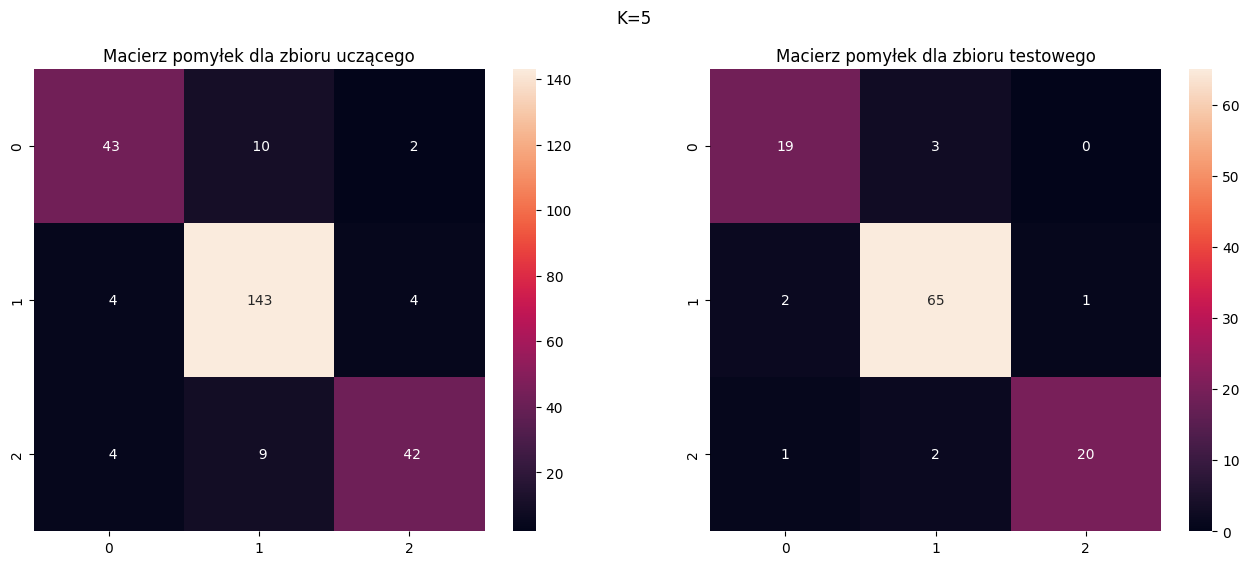

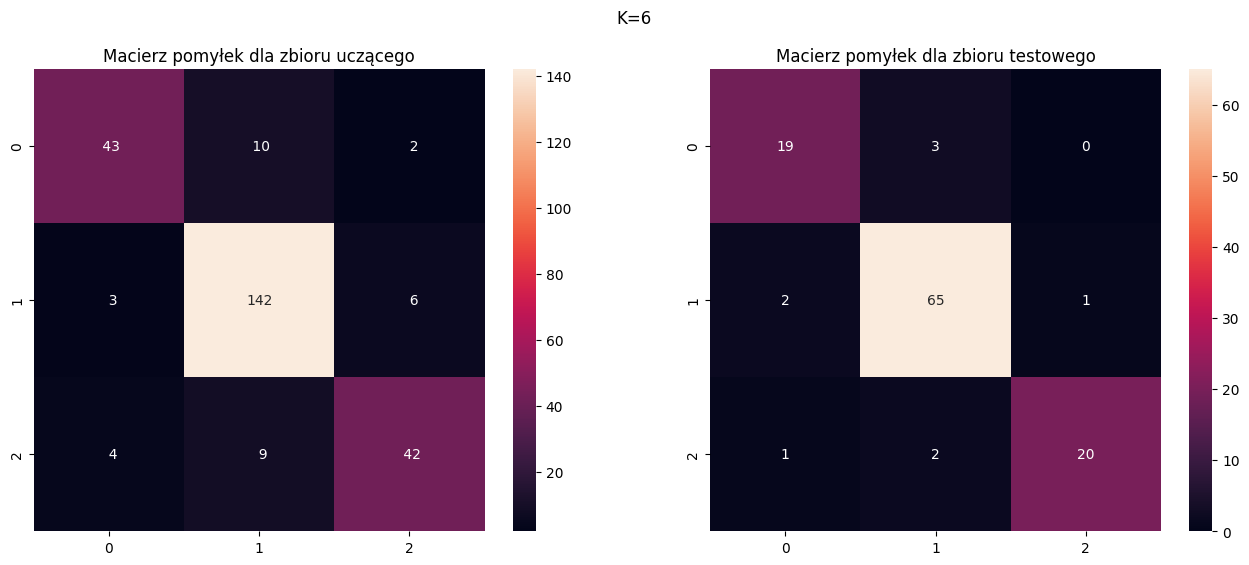

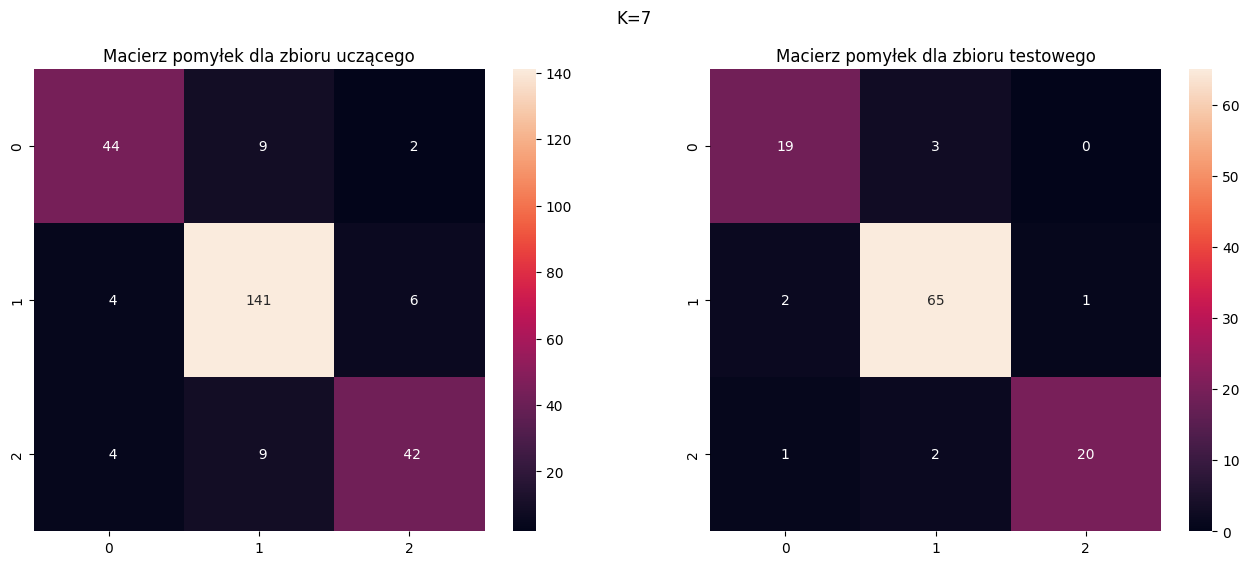

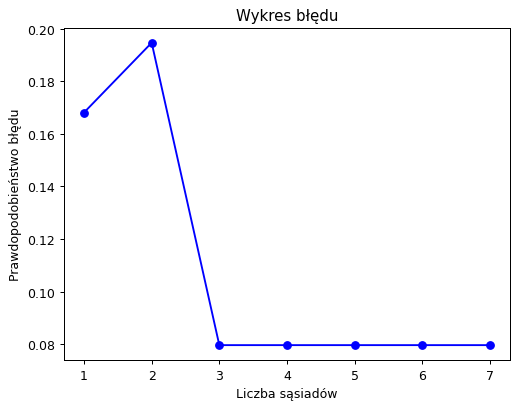

In [ ]:
data = divide(d,0.3)
rss_all=np.zeros(7)
for k in range(1,8):
    model= KNeighborsClassifier(n_neighbors=k) 
    matrix= verify(model,data,[0,1,2,3])
    rss_all[k-1] = 1-model.score(data["opis_test"],data["dec_test"])
    plt.figure(figsize=(16,6),dpi=100)
    plt.subplot(1,2,1)
    sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru uczącego")
    plt.subplot(1,2,2)
    sns.heatmap(matrix[1],annot=matrix[1],annot_kws={"size": 10})
    plt.title("Macierz pomyłek dla zbioru testowego")
    plt.suptitle("K="+str(k))
errorChart(rss_all,"Liczba sąsiadów","Prawdopodobieństwo błędu")


Dla k=3 można uzyskać optymalnie przystosowany klasyfikator o skuteczności około 92%. Dla większych k istnieje niewiele większa skuteczność, lecz obarczona ryzykiem nadmiernego dopasowania.

### Klasyfikator najbliższego prototypu

macierz pomyłek - zbiór uczący, dokładność: 0.5440613026819924
0.5440613026819924
[[49  0  6]
 [56 50 45]
 [ 8  4 43]]
macierz pomyłek - zbiór testowy, dokładność: 0.5486725663716814
0.5486725663716814
[[20  2  0]
 [17 22 29]
 [ 3  0 20]]


Text(0.5, 1.0, 'Macierz pomyłek dla zbioru testowego')

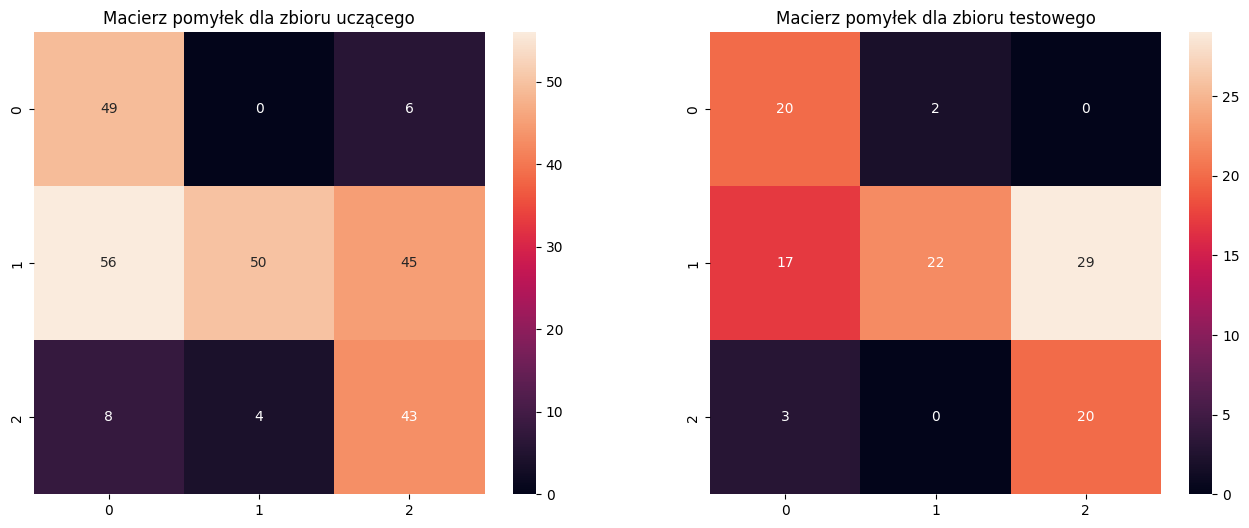

In [166]:
data = divide(d,0.3)
model= NearestCentroid()
matrix=verify(model,data,[0,1,2,3])
plt.figure(figsize=(16,6),dpi=100)
plt.subplot(1,2,1)
sns.heatmap(matrix[0],annot=matrix[0])
plt.title("Macierz pomyłek dla zbioru uczącego")
plt.subplot(1,2,2)
sns.heatmap(matrix[1],annot=matrix[1])
plt.title("Macierz pomyłek dla zbioru testowego")


Skuteczność tego klasyfikatora (ok. 54 %) jest dużo mniejsza od tej uzyskiwanej przez KNN (ok .92 %). Klasyfikator ten nie wykazuje przydatności do rozwiązania tego problemu.

### Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.8199233716475096
0.8199233716475096
[[ 34  18   3]
 [  6 139   6]
 [ 10   4  41]]
macierz pomyłek - zbiór testowy, dokładność: 0.831858407079646
0.831858407079646
[[10 12  0]
 [ 3 64  1]
 [ 2  1 20]]


Text(0.5, 1.0, 'Macierz pomyłek dla zbioru testowego')

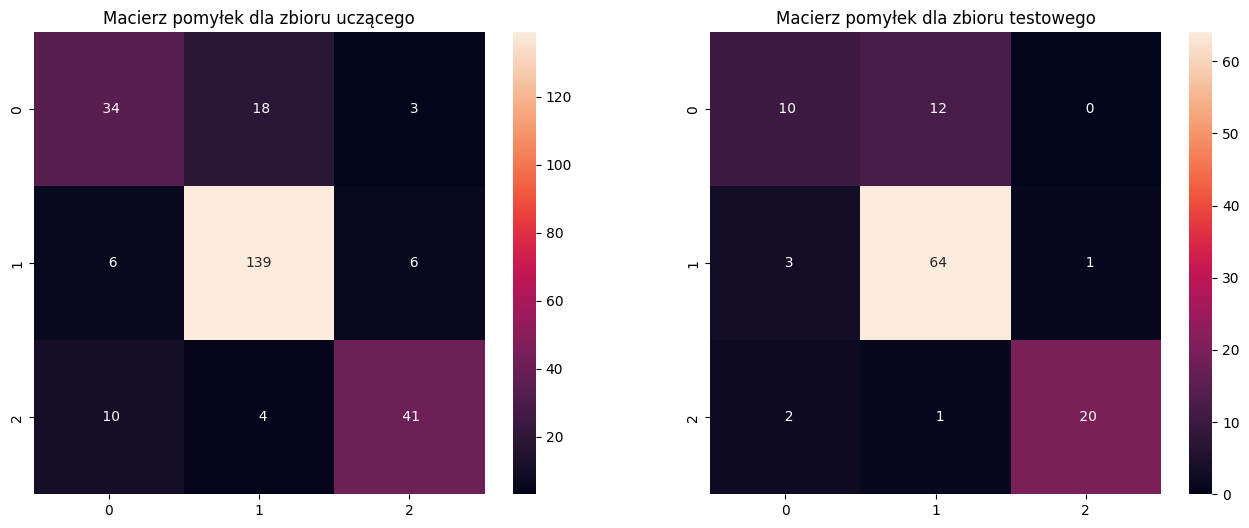

In [148]:
model= GaussianNB()
data = divide(d,0.3)
matrix=verify(model,data,[0,1,2,3])
plt.figure(figsize=(16,6),dpi=100)
plt.subplot(1,2,1)
sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
plt.title("Macierz pomyłek dla zbioru uczącego")
plt.subplot(1,2,2)
sns.heatmap(matrix[1],annot=matrix[1],fmt="3d")
plt.title("Macierz pomyłek dla zbioru testowego")

Skuteczność wynosi około 82%. Klasyfikator jest niewiele gorszy od KNN

### Drzewo decyzyjne

macierz pomyłek - zbiór uczący, dokładność: 0.5938697318007663
0.5938697318007663
[[ 48   7   0]
 [ 44 107   0]
 [ 45  10   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.584070796460177
0.584070796460177
[[19  3  0]
 [21 47  0]
 [20  3  0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7432950191570882
0.7432950191570882
[[ 45   7   3]
 [ 29 107  15]
 [  3  10  42]]
macierz pomyłek - zbiór testowy, dokładność: 0.7610619469026548
0.7610619469026548
[[19  3  0]
 [ 9 47 12]
 [ 0  3 20]]
macierz pomyłek - zbiór uczący, dokładność: 0.8773946360153256
0.8773946360153256
[[ 49   5   1]
 [  6 139   6]
 [  7   7  41]]
macierz pomyłek - zbiór testowy, dokładność: 0.911504424778761
0.911504424778761
[[19  3  0]
 [ 3 64  1]
 [ 1  2 20]]
macierz pomyłek - zbiór uczący, dokładność: 0.89272030651341
0.89272030651341
[[ 49   4   2]
 [  5 139   7]
 [  4   6  45]]
macierz pomyłek - zbiór testowy, dokładność: 0.911504424778761
0.911504424778761
[[19  3  0]
 [ 2 64  2]
 [ 2  1 20]]
macierz pomyłek - 

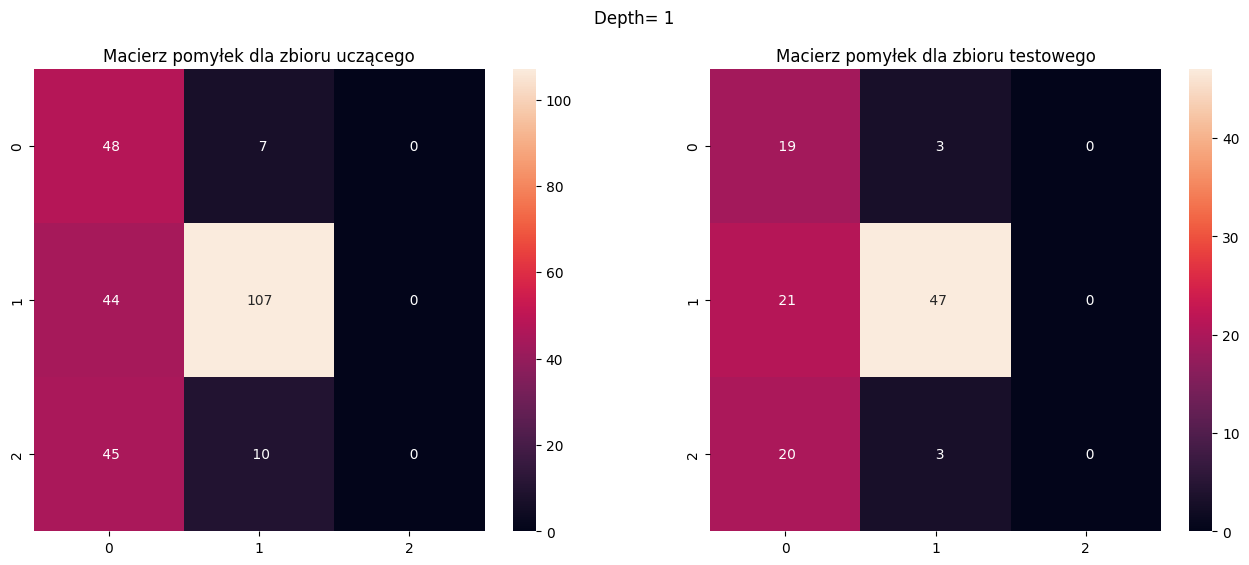

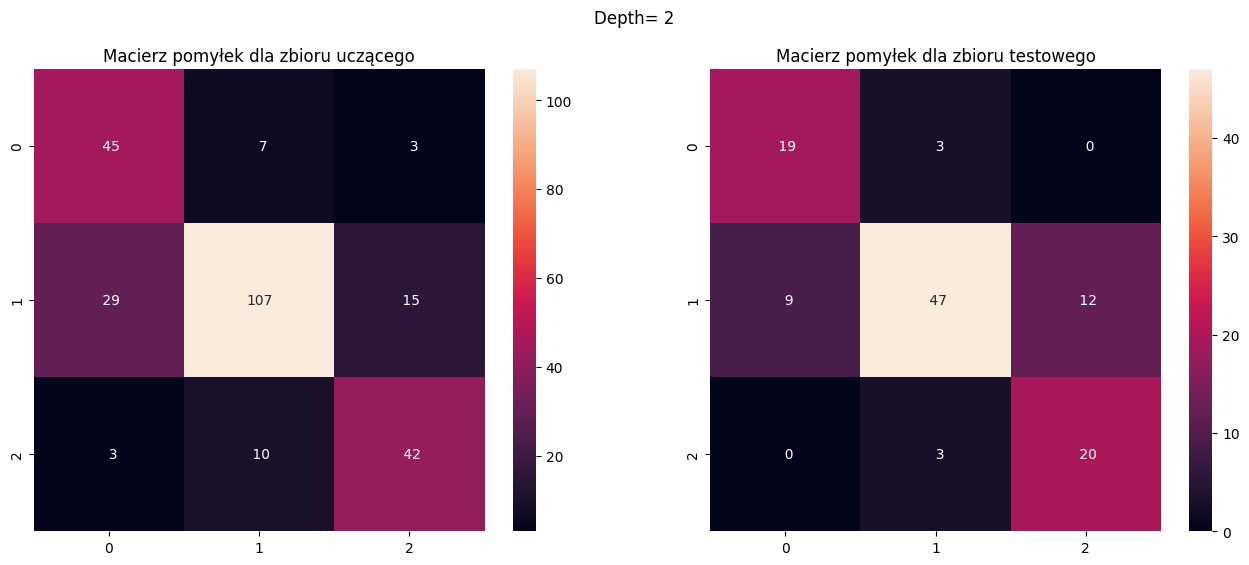

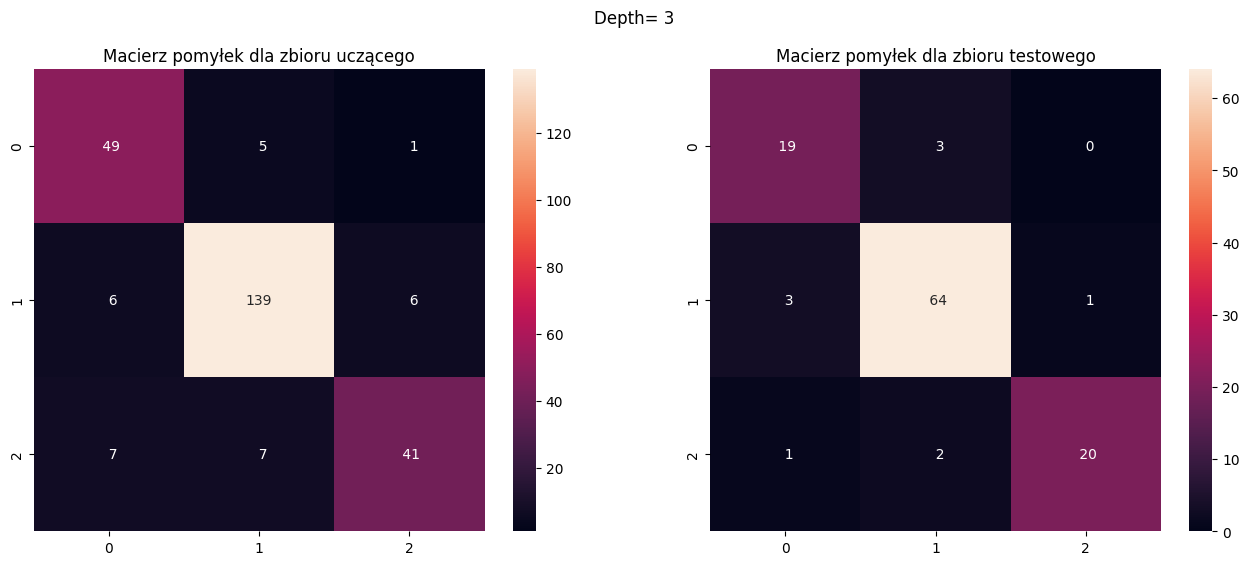

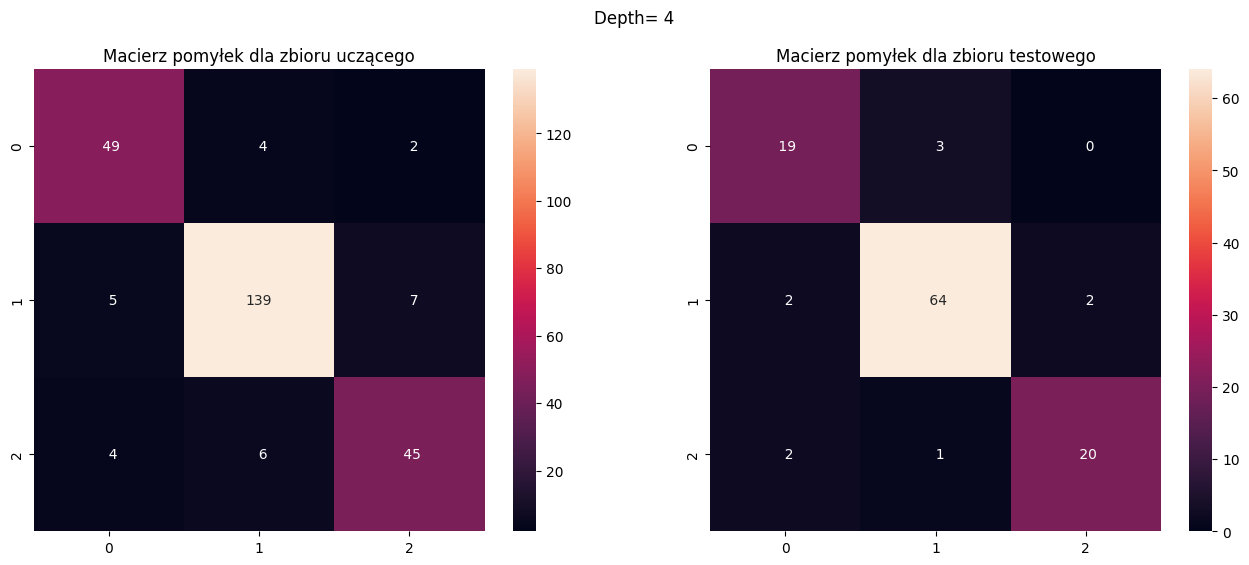

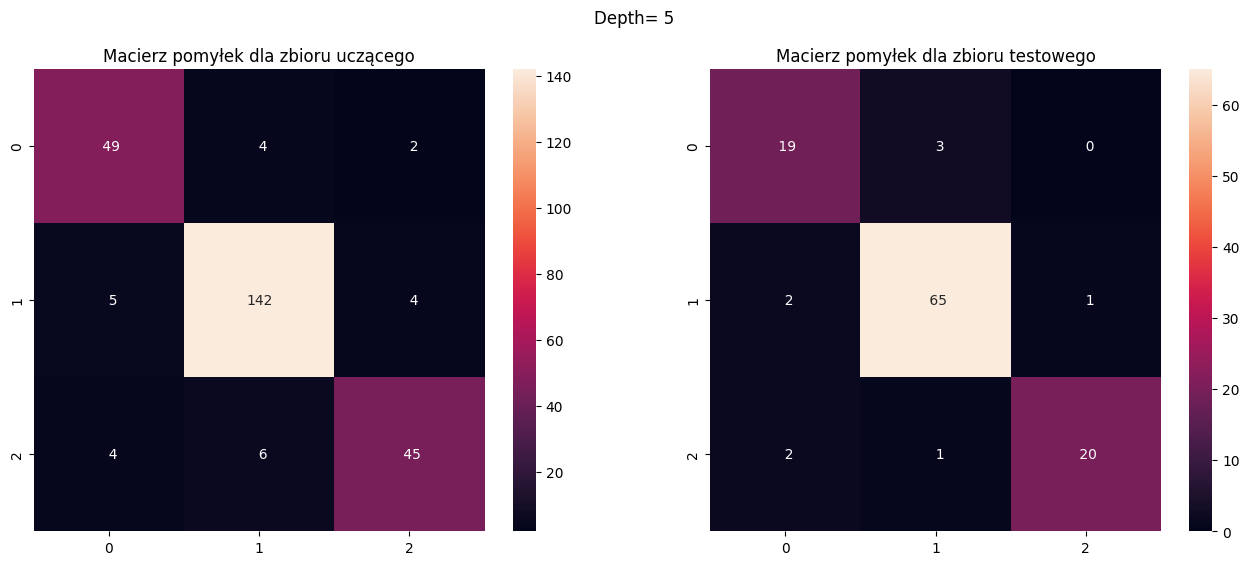

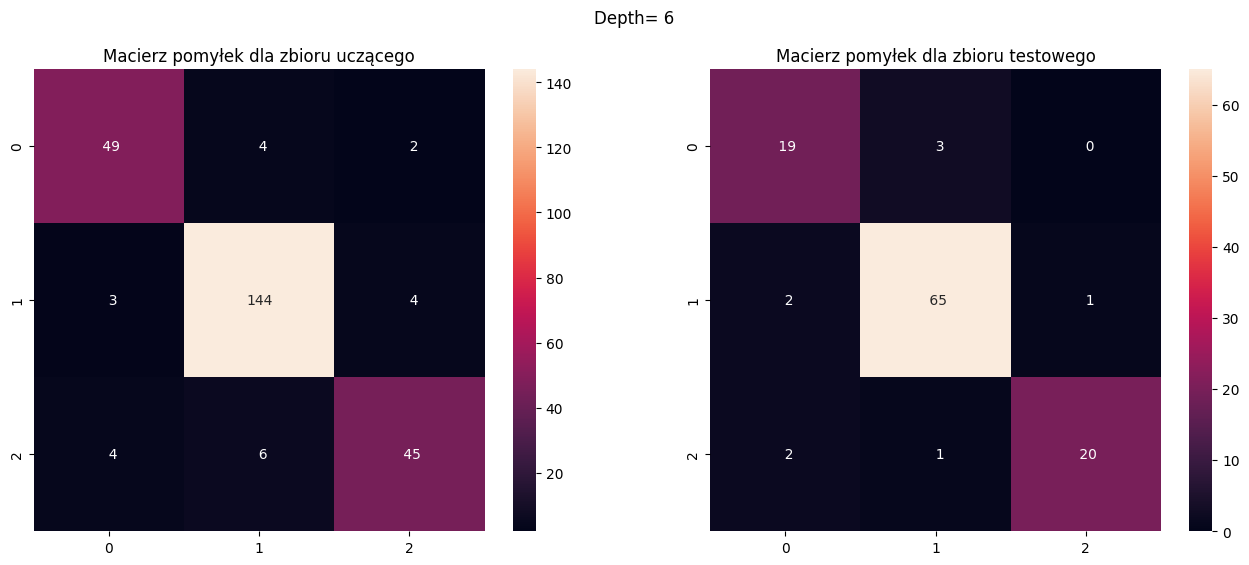

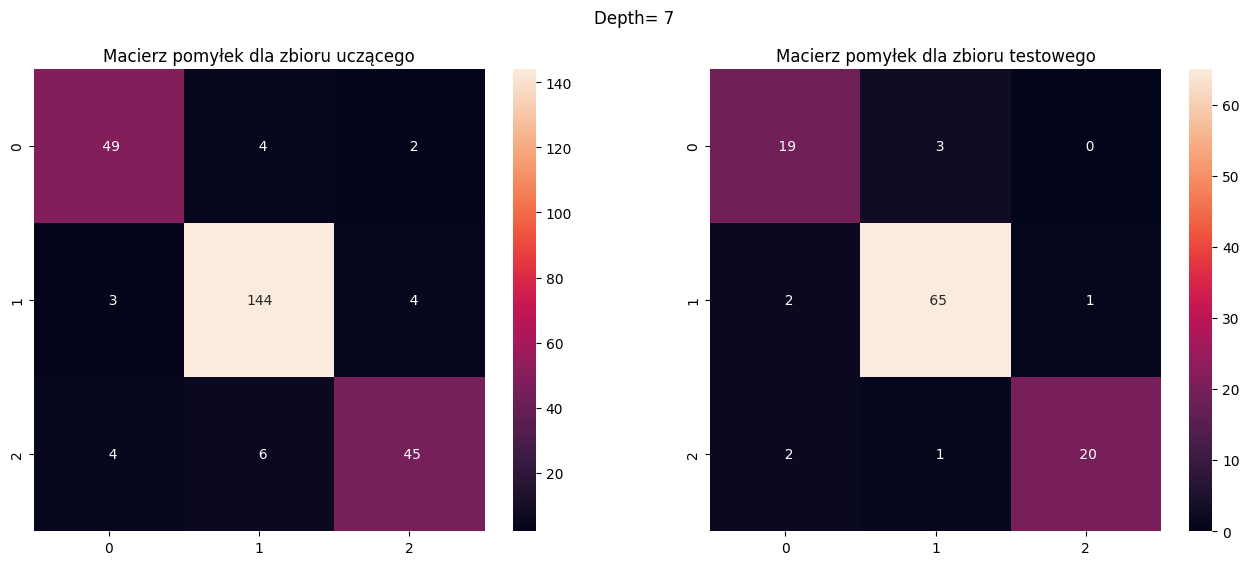

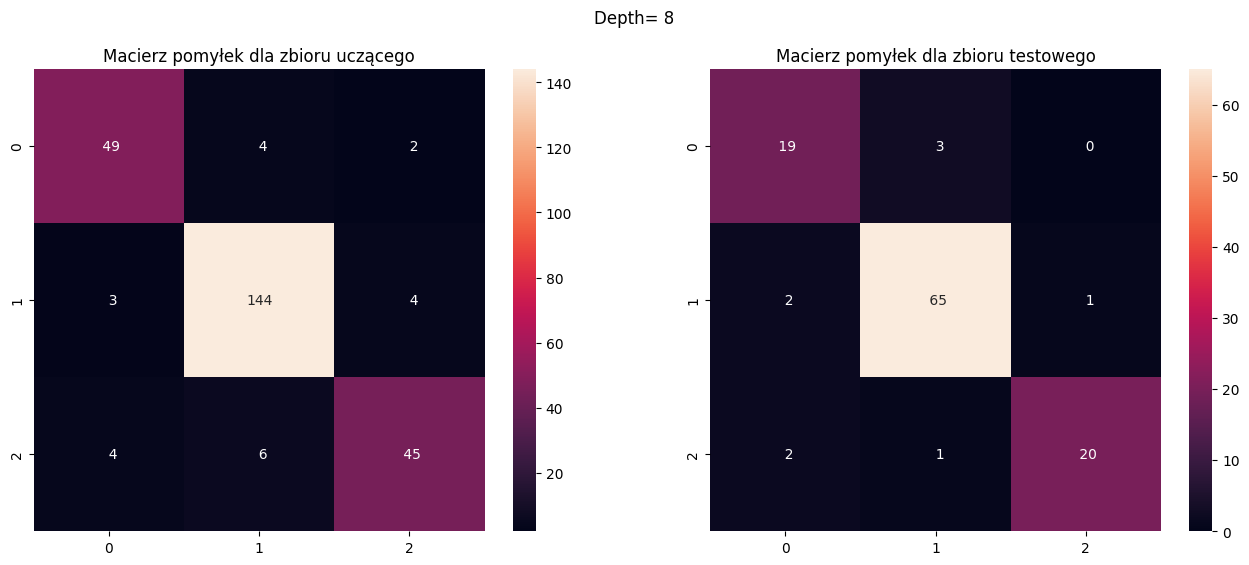

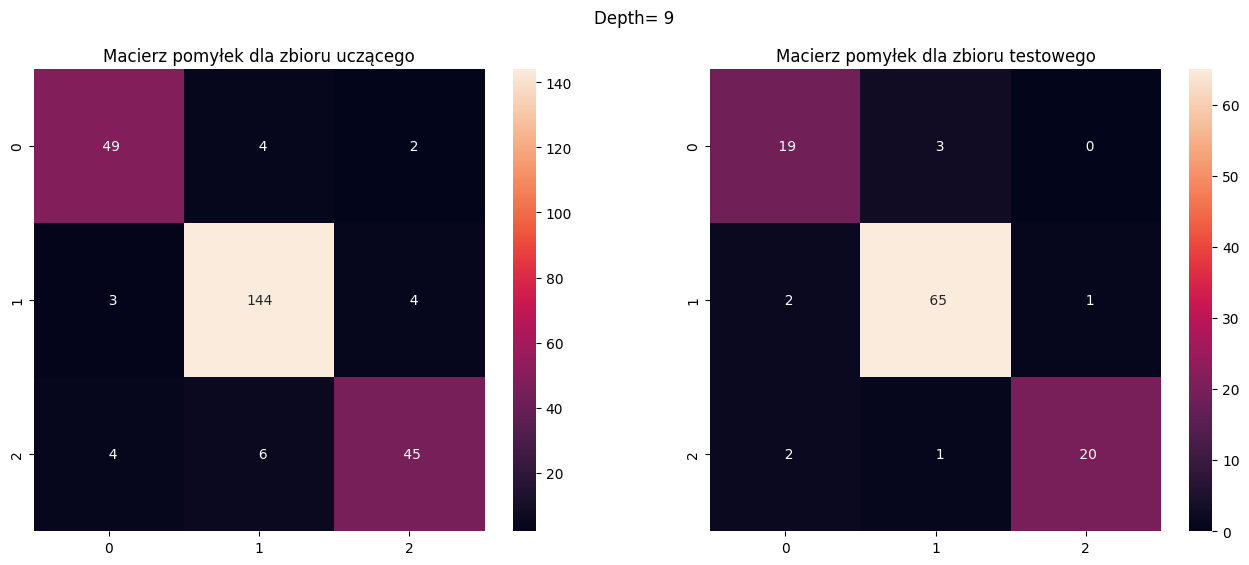

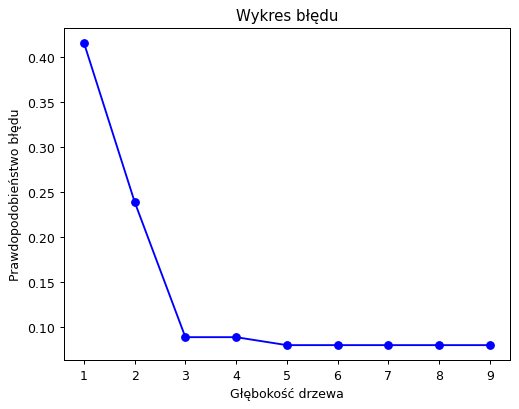

In [ ]:

data = divide(d,0.3)
rss_tree=np.zeros(9)
model=tree.DecisionTreeClassifier(max_depth=1)
for i in range (1,10):
    model= tree.DecisionTreeClassifier(max_depth=i)
    matrix=verify(model,data,[0,1,2,3])
    rss_tree[i-1]=1-model.score(data["opis_test"],data["dec_test"])
    plt.figure(figsize=(16,6),dpi=100) 
    plt.subplot(1,2,1)
    sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru uczącego")
    plt.subplot(1,2,2)
    sns.heatmap(matrix[1],annot=matrix[1],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru testowego")  
    plt.suptitle("Depth= "+str(i)) 
errorChart(rss_tree,"Głębokość drzewa", "Prawdopodobieństwo błędu")

 

Optymalna głębokość wynosi 3. Klasyfikator uzyskuje wówczas skuteczność około 92% - tożsamą, do tej uzyskiwanej przez KNN.
Dla większych głębokości obserwujemy brak wzrostu skuteczności.